# Forecasting Demand for Moroccan Local Products in National and International Markets: A Data-Driven Approach
 # Authors : BELZEDI Ghizlane & DAOUDI Halima

#1. Data Exploration

## Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading


*   The file export_value_growth contains the percentage growth in export value from 2003 to 2022.
*   The file share_of_country_cluster_exports contains the share of the value in the country's cluster exports from 2003 to 2022.
*  
The file exported_value contains the export values of Morocco from 2003 to 2022.






In [57]:
# Data Loading
exported_value = pd.read_csv('exported_value.csv')
export_value_growth = pd.read_csv('export_value_growth.csv')
share_of_country_cluster_exports = pd.read_csv('share_of_country_cluster_exports.csv')


## Data Exploration

In [58]:
# Display the first few rows of the dataset to visualize the export values by product
exported_value.head()

Code                                      Product label  \
0  TOTAL                                       All products   
1     31                                        Fertilisers   
2     87  Vehicles other than railway or tramway rolling...   
3     85  Electrical machinery and equipment and parts t...   
4     62  Articles of apparel and clothing accessories, ...   

   Exported value in 2003  Exported value in 2004  Exported value in 2005  \
0                 8738341                 9870179                11197413   
1                  371608                  431325                  444344   
2                   46680                   55256                   76111   
3                 1176179                 1257912                 1599657   
4                 1952757                 2116194                 2040800   

   Exported value in 2006  Exported value in 2007  Exported value in 2008  \
0                12731303                15321255                20094617   
1                  533674                  876747                 1412452   
2                  117890                  161777                  201129   
3                 1930282                 2359746                 2504401   
4                 2377490                 2532616                 2483422   

   Exported value in 2009  Exported value in 2010  ...  \
0                14027369                17764791  ...   
1                  697642                 1561945  ...   
2                  223629                  245346  ...   
3                 1998575                 2632491  ...   
4                 2236326                 2142622  ...   

   Exported value in 2013  Exported value in 2014  Exported value in 2015  \
0                21967951                23815816                22197567   
1                 1924549                 2060879                 1872511   
2                 1642522                 2456599                 2644755   
3                 3170166                 3781969                 3509440   
4                 2261995                 2401451                 2060468   

   Exported value in 2016  Exported value in 2017  Exported value in 2018  \
0                22850021                25619900                29317739   
1                 2133011                 2580227                 3168304   
2                 3137905                 3394836                 3875243   
3                 3739194                 4228090                 4925873   
4                 2238045                 2401926                 2533095   

   Exported value in 2019  Exported value in 2020  Exported value in 2021  \
0                29592492                27704922                36578743   
1                 2914949                 3385504                 5714861   
2                 3830883                 3614653                 5041423   
3                 5300422                 4658452                 5249193   
4                 2424111                 1911834                 2518580   

   Exported value in 2022  
0                42331463  
1                 7715003  
2                 6370692  
3                 5995016  
4                 2726952  

[5 rows x 22 columns]

In [59]:
#Dimensions of our dataset
exported_value.shape

(98, 22)

In [60]:
#Check the data info
exported_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code                    98 non-null     object
 1   Product label           98 non-null     object
 2   Exported value in 2003  98 non-null     int64 
 3   Exported value in 2004  98 non-null     int64 
 4   Exported value in 2005  98 non-null     int64 
 5   Exported value in 2006  98 non-null     int64 
 6   Exported value in 2007  98 non-null     int64 
 7   Exported value in 2008  98 non-null     int64 
 8   Exported value in 2009  98 non-null     int64 
 9   Exported value in 2010  98 non-null     int64 
 10  Exported value in 2011  98 non-null     int64 
 11  Exported value in 2012  98 non-null     int64 
 12  Exported value in 2013  98 non-null     int64 
 13  Exported value in 2014  98 non-null     int64 
 14  Exported value in 2015  98 non-null     int64 
 15  Exported

In [61]:
exported_value.describe()

Exported value in 2003  Exported value in 2004  Exported value in 2005  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             1.783335e+05            2.014323e+05            2.285186e+05   
std              9.112747e+05            1.025980e+06            1.159090e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              1.920250e+03            1.464500e+03            3.471000e+03   
50%              1.313200e+04            1.690100e+04            1.882900e+04   
75%              4.119425e+04            4.821850e+04            5.780675e+04   
max              8.738341e+06            9.870179e+06            1.119741e+07   

       Exported value in 2006  Exported value in 2007  Exported value in 2008  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             2.598225e+05            3.126787e+05            4.100942e+05   
std              1.318700e+06            1.583579e+06            2.081394e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              5.006750e+03            5.985000e+03            6.472500e+03   
50%              2.399000e+04            2.443850e+04            2.651550e+04   
75%              6.796100e+04            8.801100e+04            9.365950e+04   
max              1.273130e+07            1.532126e+07            2.009462e+07   

       Exported value in 2009  Exported value in 2010  Exported value in 2011  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             2.862728e+05            3.625467e+05            4.418354e+05   
std              1.445491e+06            1.828460e+06            2.231009e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              4.936250e+03            6.190750e+03            6.190250e+03   
50%              2.330050e+04            3.067950e+04            2.719300e+04   
75%              8.859300e+04            1.162568e+05            9.738800e+04   
max              1.402737e+07            1.776479e+07            2.164993e+07   

       Exported value in 2012  Exported value in 2013  Exported value in 2014  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             4.370854e+05            4.483255e+05            4.860371e+05   
std              2.203461e+06            2.259053e+06            2.454092e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              6.659000e+03            6.795250e+03            6.371250e+03   
50%              2.725550e+04            2.734150e+04            3.290400e+04   
75%              1.196208e+05            1.132120e+05            1.331908e+05   
max              2.141718e+07            2.196795e+07            2.381582e+07   

       Exported value in 2015  Exported value in 2016  Exported value in 2017  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             4.530116e+05            4.663269e+05            5.228551e+05   
std              2.289926e+06            2.362347e+06            2.648011e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              5.781750e+03            5.645500e+03            6.033500e+03   
50%              3.237400e+04            2.547650e+04            3.289000e+04   
75%              1.241438e+05            1.260702e+05            1.527128e+05   
max              2.219757e+07            2.285002e+07            2.561990e+07   

       Exported value in 2018  Exported value in 2019  Exported value in 2020  \
count            9.800000e+01            9.800000e+01            9.800000e+01   
mean             5.983212e+05            6.039284e+05            5.654066e+05   
std              3.032003e+06            3.061529e+06            2.866645e+06   
min              0.000000e+00    

The following script displays the initial rows of the dataset to visualize the export values by product.
It provides an overview of the export values for the first few products in the dataset.


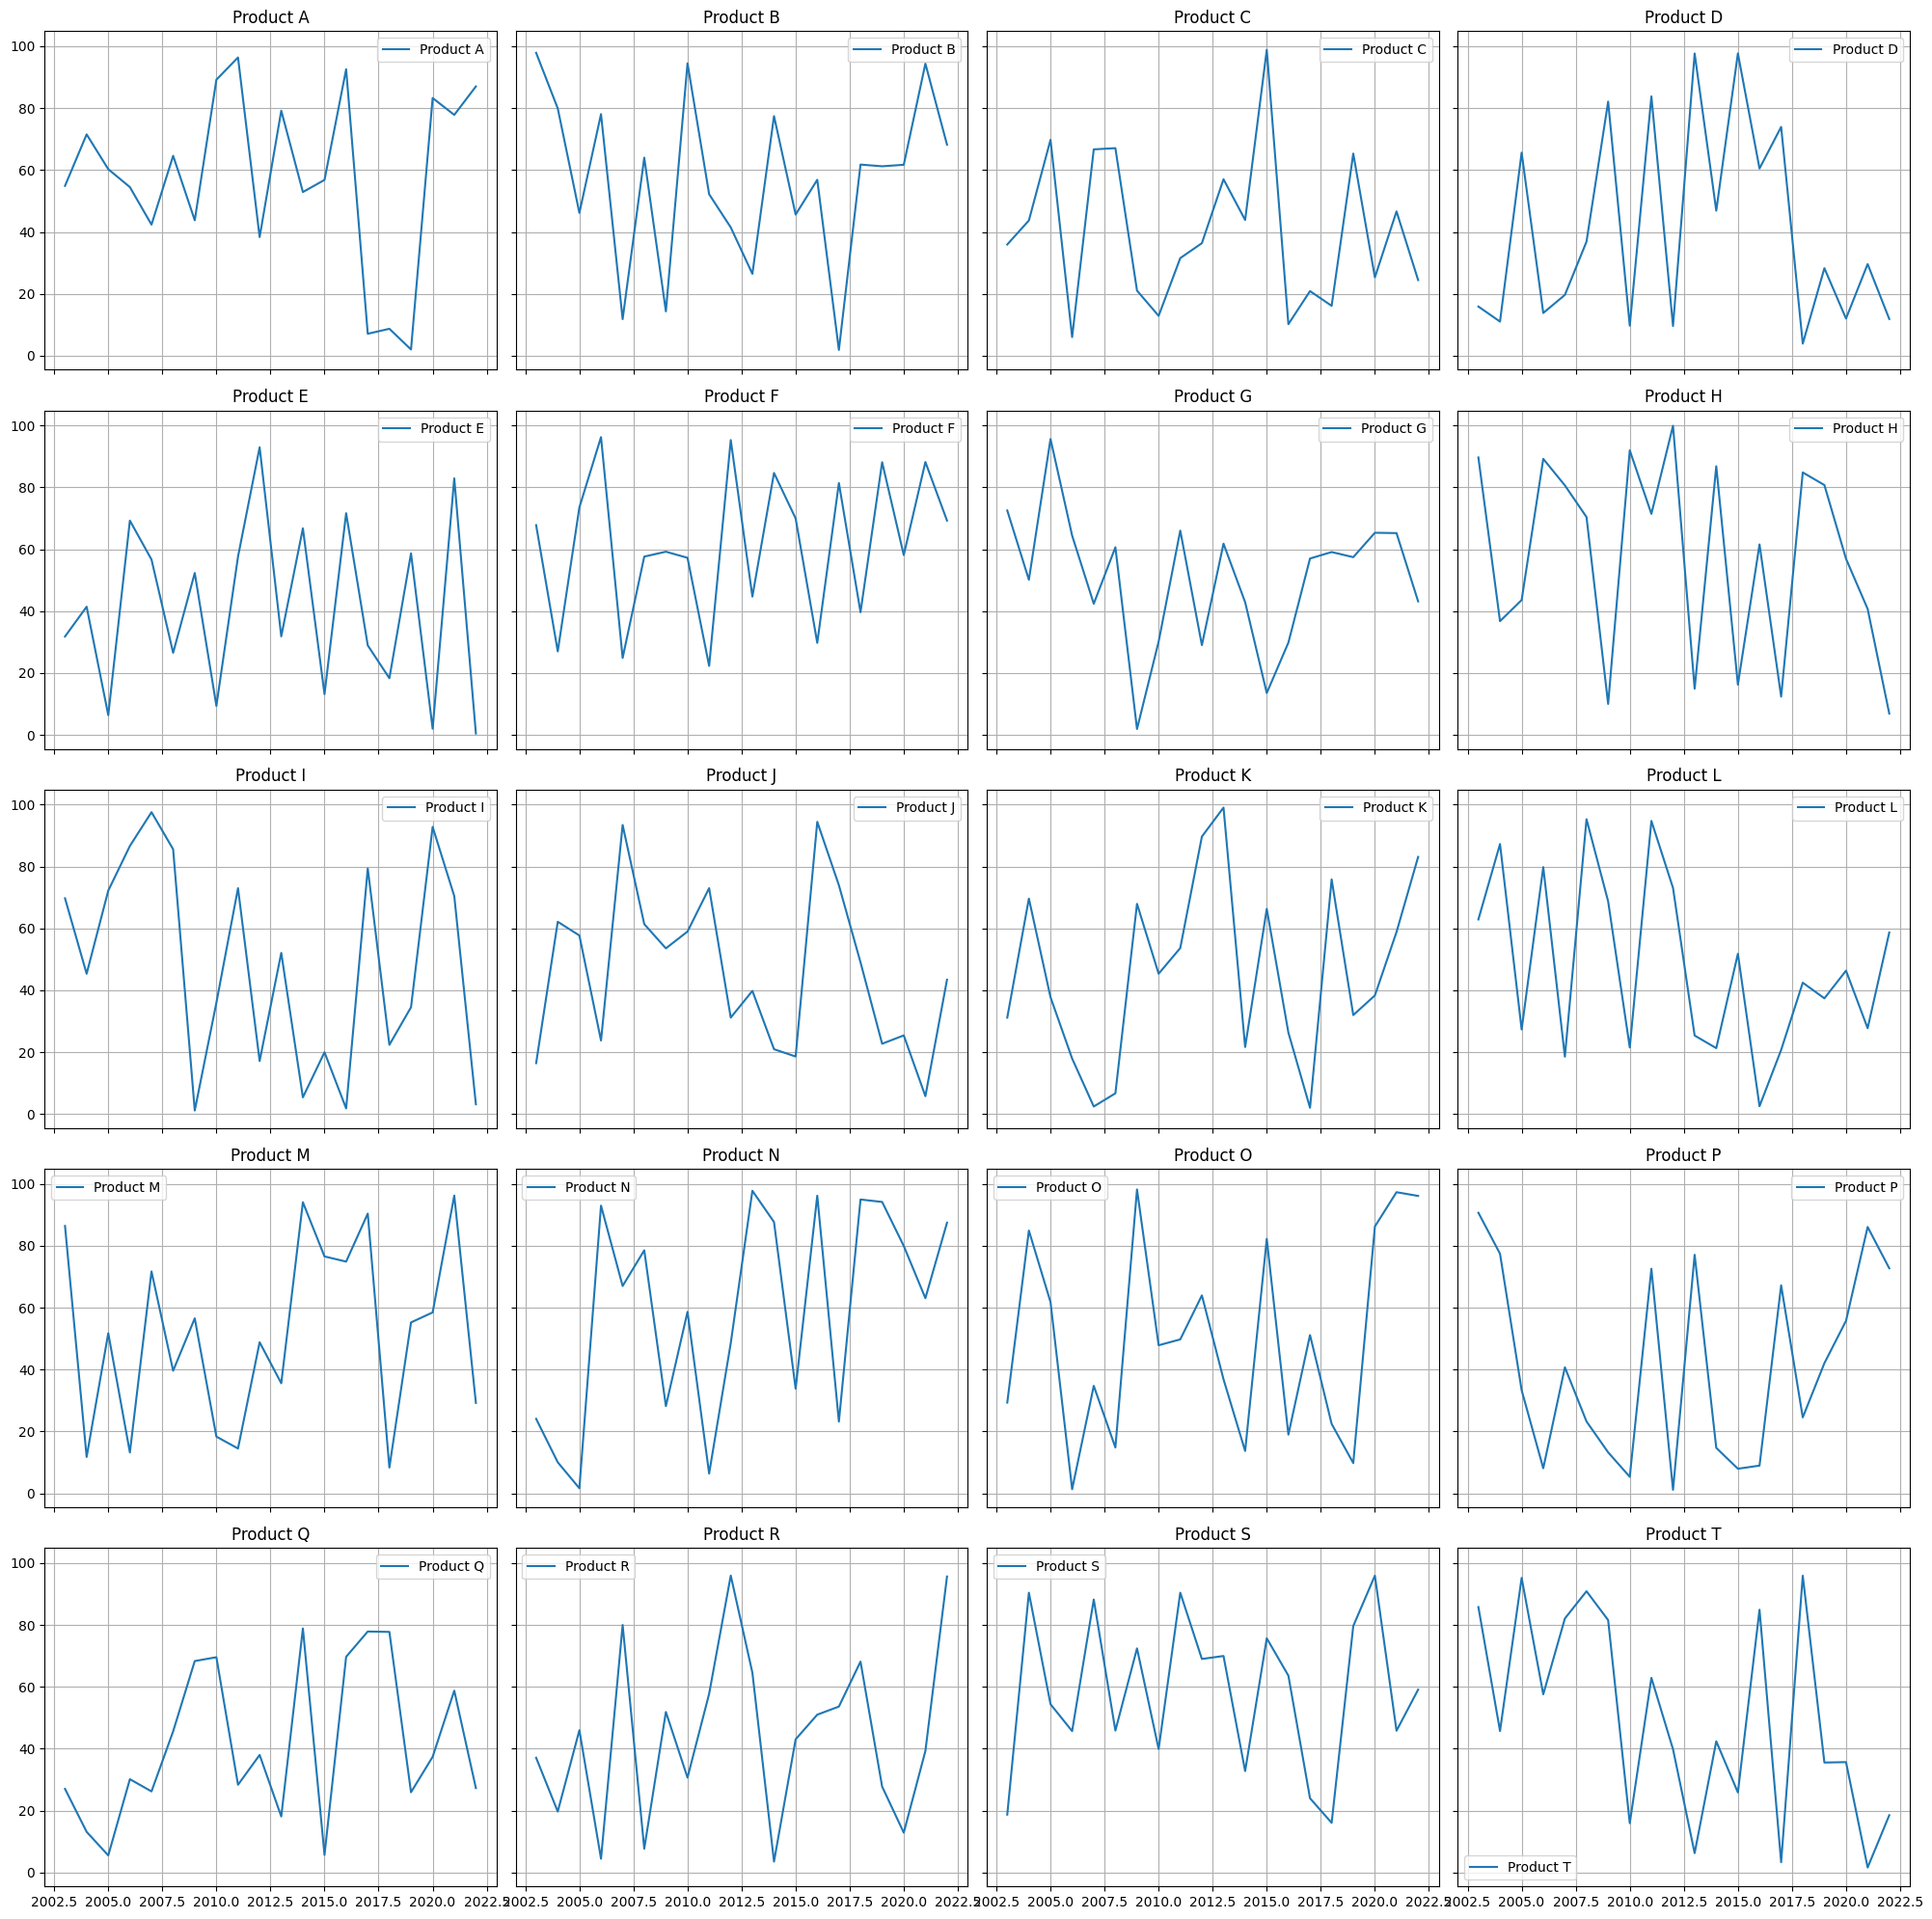

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data creation for multiple products
np.random.seed(0)
years = np.arange(2003, 2023)
products = [f'Product {chr(65+i)}' for i in range(20)]  # 20 products (A to T)
years_repeated = np.tile(years, len(products))
products_repeated = np.repeat(products, len(years))
values = np.random.rand(len(years) * len(products)) * 100

# Creating the DataFrame directly
time_series = pd.DataFrame({
    'year': years_repeated,
    'value': values,
    'product': products_repeated
})

# Plotting
num_products = len(products)
cols = 4  # Number of columns of subplots
rows = (num_products + cols - 1) // cols  # Calculate the required number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 20), sharex=True, sharey=True)

for i, product in enumerate(products):
    row, col = divmod(i, cols)
    ax = axs[row, col]
    product_time_series = time_series[time_series['product'] == product]
    ax.plot(
        product_time_series['year'],
        product_time_series['value'],
        label=product
    )
    ax.set_title(product)
    ax.grid(True)
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
# Display the initial rows of the dataset to visualize the growth in export values by product
export_value_growth.head()

Code                                      Product label  \
0  TOTAL                                       All products   
1     31                                        Fertilisers   
2     87  Vehicles other than railway or tramway rolling...   
3     85  Electrical machinery and equipment and parts t...   
4     62  Articles of apparel and clothing accessories, ...   

   exportations growth in value between 2003-2004, %  \
0                                               13.0   
1                                               16.0   
2                                               18.0   
3                                                7.0   
4                                                8.0   

   exportations growth in value between 2004-2005, %  \
0                                               13.0   
1                                                3.0   
2                                               38.0   
3                                               27.0   
4                                               -4.0   

   exportations growth in value between 2005-2006, %  \
0                                               14.0   
1                                               20.0   
2                                               55.0   
3                                               21.0   
4                                               16.0   

   exportations growth in value between 2006-2007, %  \
0                                               20.0   
1                                               64.0   
2                                               37.0   
3                                               22.0   
4                                                7.0   

   exportations growth in value between 2007-2008, %  \
0                                               31.0   
1                                               61.0   
2                                               24.0   
3                                                6.0   
4                                               -2.0   

   exportations growth in value between 2008-2009, %  \
0                                              -30.0   
1                                              -51.0   
2                                               11.0   
3                                              -20.0   
4                                              -10.0   

   exportations growth in value between 2009-2010, %  \
0                                               27.0   
1                                              124.0   
2                                               10.0   
3                                               32.0   
4                                               -4.0   

   exportations growth in value between 2010-2011, %  ...  \
0                                               22.0  ...   
1                                               48.0  ...   
2                                               74.0  ...   
3                                               21.0  ...   
4                                                6.0  ...   

   exportations growth in value between 2013-2014, %  \
0                                                8.0   
1                                                7.0   
2                                               50.0   
3                                               19.0   
4                                                6.0   

   exportations growth in value between 2014-2015, %  \
0                                               -7.0   
1                                               -9.0   
2                                                8.0   
3                                               -7.0   
4                                              -14.0   

   exportations growth in value between 2015-2016, %  \
0                                                3.0   
1                                               14.0   
2                                               19.0   
3

In [64]:
export_value_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Code                                               98 non-null     object 
 1   Product label                                      98 non-null     object 
 2   exportations growth in value between 2003-2004, %  96 non-null     float64
 3   exportations growth in value between 2004-2005, %  97 non-null     float64
 4   exportations growth in value between 2005-2006, %  96 non-null     float64
 5   exportations growth in value between 2006-2007, %  97 non-null     float64
 6   exportations growth in value between 2007-2008, %  97 non-null     float64
 7   exportations growth in value between 2008-2009, %  97 non-null     float64
 8   exportations growth in value between 2009-2010, %  97 non-null     float64
 9   exportations

The following script displays the initial rows of the dataset to visualize the growth in export values by product.
It provides an overview of the export value growth for the first few products in the dataset.


In [65]:
#Dimensions of our dataset
export_value_growth.shape

(98, 22)

In [66]:
export_value_growth.describe()

exportations growth in value between 2003-2004, %  \
count                                          96.000000   
mean                                           51.875000   
std                                           200.681903   
min                                           -97.000000   
25%                                            -7.250000   
50%                                            15.000000   
75%                                            34.500000   
max                                          1625.000000   

       exportations growth in value between 2004-2005, %  \
count                                          97.000000   
mean                                          641.061856   
std                                          4170.929897   
min                                          -100.000000   
25%                                            -4.000000   
50%                                            15.000000   
75%                                            40.000000   
max                                         32733.000000   

       exportations growth in value between 2005-2006, %  \
count                                          96.000000   
mean                                          358.781250   
std                                          2732.128741   
min                                           -89.000000   
25%                                            -0.250000   
50%                                            16.000000   
75%                                            48.250000   
max                                         26749.000000   

       exportations growth in value between 2006-2007, %  \
count                                          97.000000   
mean                                          169.494845   
std                                          1180.416453   
min                                           -99.000000   
25%                                            -3.000000   
50%                                            19.000000   
75%                                            53.000000   
max                                         11467.000000   

       exportations growth in value between 2007-2008, %  \
count                                          97.000000   
mean                                          226.216495   
std                                          1354.814634   
min                                           -91.000000   
25%                                           -15.000000   
50%                                             9.000000   
75%                                            36.000000   
max                                         12339.000000   

       exportations growth in value between 2008-2009, %  \
count                                          97.000000   
mean                                           18.216495   
std                                           171.609551   
min                                           -95.000000   
25%                                           -24.000000   
50%                                            -6.000000   
75%                                            14.000000   
max                                          1590.000000   

       exportations growth in value between 2009-2010, %  \
count                                          97.000000   
mean                                           85.556701   
std                                           415.011997   
min                                           -99.000000   
25%                                            -3.000000   
50%                                            13.000000   
75%                                            50.000000   
max                                          3363.000000   

       exportations growth in value between 2010-2011, %  \
count                                          97.000000   
mean                                          274.185567   
std                                     

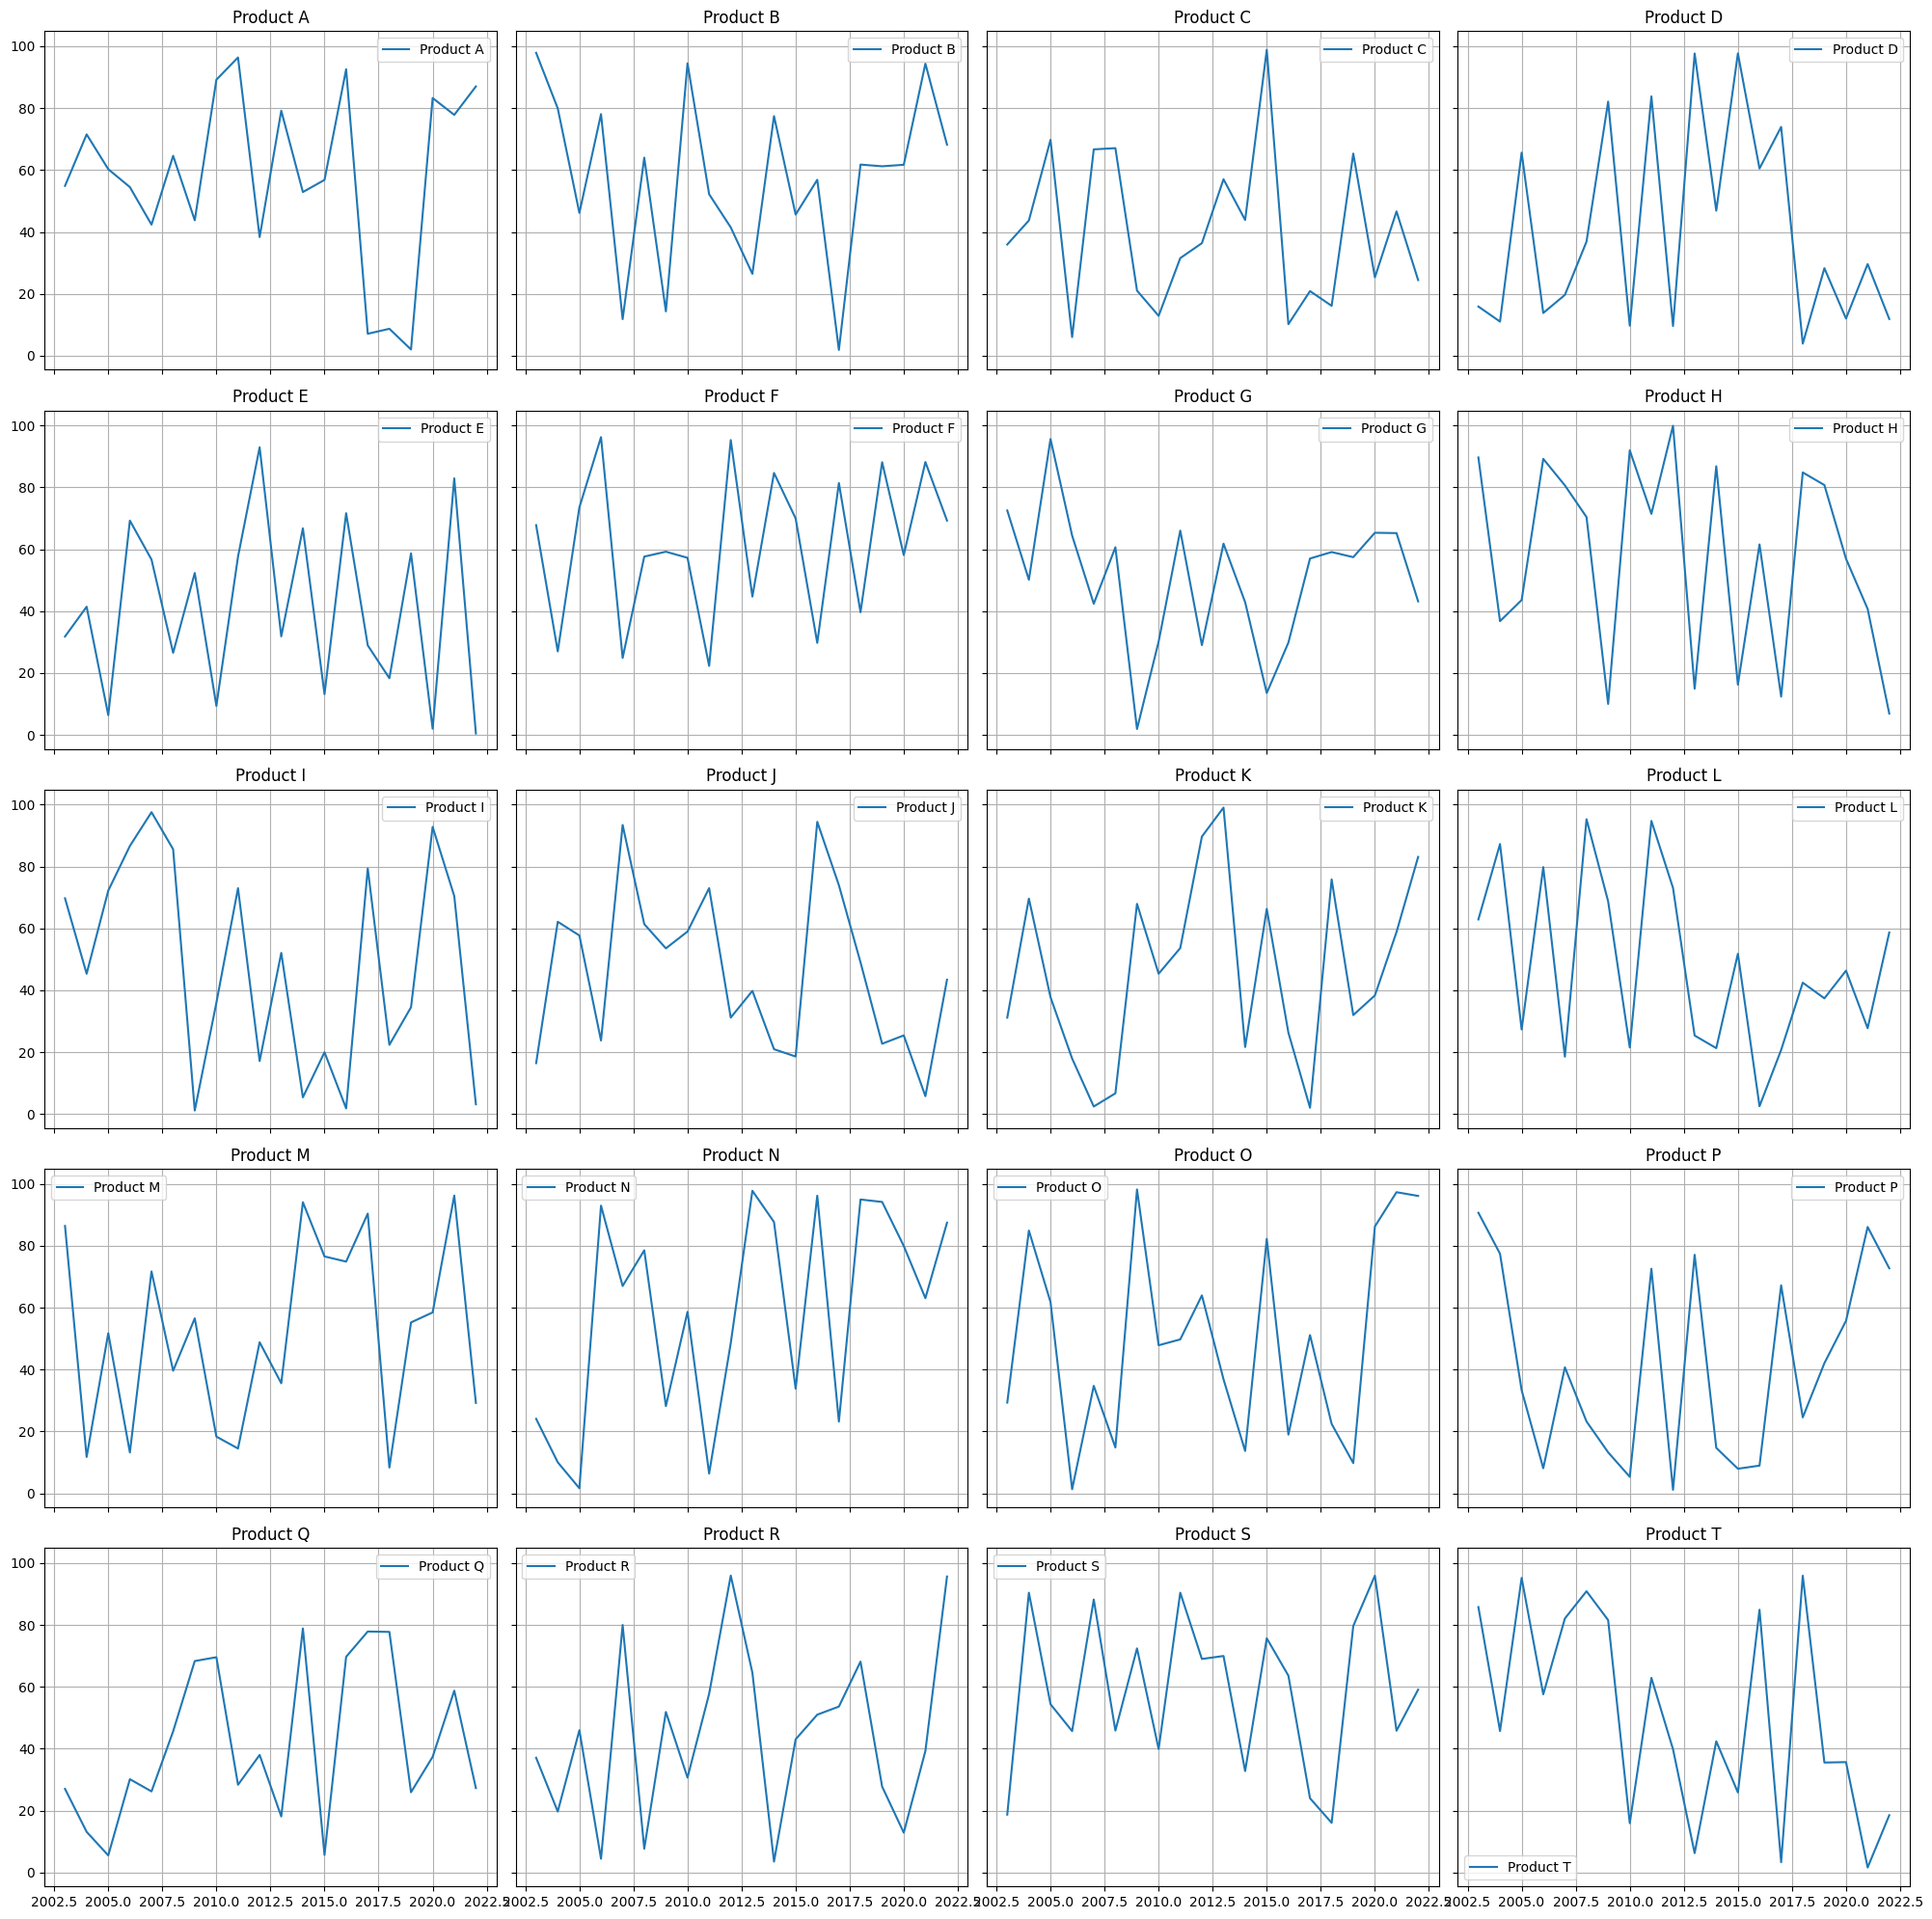

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data creation for multiple products
np.random.seed(0)
years = np.arange(2003, 2023)
products = [f'Product {chr(65+i)}' for i in range(20)]  # 20 products (A to T)
years_repeated = np.tile(years, len(products))
products_repeated = np.repeat(products, len(years))
values = np.random.rand(len(years) * len(products)) * 100

# Creating the DataFrame directly
time_series = pd.DataFrame({
    'year': years_repeated,
    'value': values,
    'product': products_repeated
})

# Plotting
num_products = len(products)
cols = 4  # Number of columns of subplots
rows = (num_products + cols - 1) // cols  # Calculate the required number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 20), sharex=True, sharey=True)

for i, product in enumerate(products):
    row, col = divmod(i, cols)
    ax = axs[row, col]
    product_time_series = time_series[time_series['product'] == product]
    ax.plot(
        product_time_series['year'],
        product_time_series['value'],
        label=product
    )
    ax.set_title(product)
    ax.grid(True)
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [68]:
# Display the initial rows of the dataset to visualize the share in export values by product (percentage)
share_of_country_cluster_exports.head()

Code                                      Product label  \
0  TOTAL                                       All products   
1     31                                        Fertilisers   
2     87  Vehicles other than railway or tramway rolling...   
3     85  Electrical machinery and equipment and parts t...   
4     62  Articles of apparel and clothing accessories, ...   

   Share in value in country's cluster exports, % in 2003  \
0                                             100.00        
1                                               4.25        
2                                               0.53        
3                                              13.46        
4                                              22.35        

   Share in value in country's cluster exports, % in 2004  \
0                                             100.00        
1                                               4.37        
2                                               0.56        
3                                              12.74        
4                                              21.44        

   Share in value in country's cluster exports, % in 2005  \
0                                             100.00        
1                                               3.97        
2                                               0.68        
3                                              14.29        
4                                              18.23        

   Share in value in country's cluster exports, % in 2006  \
0                                             100.00        
1                                               4.19        
2                                               0.93        
3                                              15.16        
4                                              18.67        

   Share in value in country's cluster exports, % in 2007  \
0                                             100.00        
1                                               5.72        
2                                               1.06        
3                                              15.40        
4                                              16.53        

   Share in value in country's cluster exports, % in 2008  \
0                                             100.00        
1                                               7.03        
2                                               1.00        
3                                              12.46        
4                                              12.36        

   Share in value in country's cluster exports, % in 2009  \
0                                             100.00        
1                                               4.97        
2                                               1.59        
3                                              14.25        
4                                              15.94        

   Share in value in country's cluster exports, % in 2010  ...  \
0                                             100.00       ...   
1                                               8.79       ...   
2                                               1.38       ...   
3                                              14.82       ...   
4                                              12.06       ...   

   Share in value in country's cluster exports, % in 2013  \
0                                             100.00        
1                                               8.76        
2                                               7.48        
3                                              14.43        
4                                              10.30        

   Share in value in country's cluster exports, % in 2014  \
0                                             100.00        
1                                               8.65        
2                                              10.31        
3                                              1

In [69]:
share_of_country_cluster_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    98 non-null     object 
 1   Product label                                           98 non-null     object 
 2   Share in value in country's cluster exports, % in 2003  98 non-null     float64
 3   Share in value in country's cluster exports, % in 2004  98 non-null     float64
 4   Share in value in country's cluster exports, % in 2005  98 non-null     float64
 5   Share in value in country's cluster exports, % in 2006  98 non-null     float64
 6   Share in value in country's cluster exports, % in 2007  98 non-null     float64
 7   Share in value in country's cluster exports, % in 2008  98 non-null     float64
 8   Share in value in country's cluster export

The following script visualizes the exports data for the first 20 products.
It creates subplots to display the growth in export value over time for each of these products.
The products are distributed across multiple rows and columns to ensure clear and organized visualization.


In [70]:
#Dimensions of our dataset
share_of_country_cluster_exports.shape

(98, 22)

In [71]:
share_of_country_cluster_exports.describe()

Share in value in country's cluster exports, % in 2003  \
count                                          98.000000        
mean                                            2.040714        
std                                            10.428636        
min                                             0.000000        
25%                                             0.020000        
50%                                             0.150000        
75%                                             0.467500        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2004  \
count                                          98.000000        
mean                                            2.040408        
std                                            10.394769        
min                                             0.000000        
25%                                             0.012500        
50%                                             0.170000        
75%                                             0.490000        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2005  \
count                                          98.000000        
mean                                            2.040714        
std                                            10.351585        
min                                             0.000000        
25%                                             0.030000        
50%                                             0.165000        
75%                                             0.515000        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2006  \
count                                          98.000000        
mean                                            2.040816        
std                                            10.357796        
min                                             0.000000        
25%                                             0.042500        
50%                                             0.190000        
75%                                             0.535000        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2007  \
count                                          98.000000        
mean                                            2.040816        
std                                            10.335841        
min                                             0.000000        
25%                                             0.040000        
50%                                             0.160000        
75%                                             0.577500        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2008  \
count                                          98.000000        
mean                                            2.040918        
std                                            10.357963        
min                                             0.000000        
25%                                             0.032500        
50%                                             0.130000        
75%                                             0.465000        
max                                           100.000000        

       Share in value in country's cluster exports, % in 2009  \
count                                          98.000000        
mean                                            2.040714        
std                                            10.304745        
min                                             0.000000        
25%                                             0.032500        
50%                                             0.170000        
75%                                 

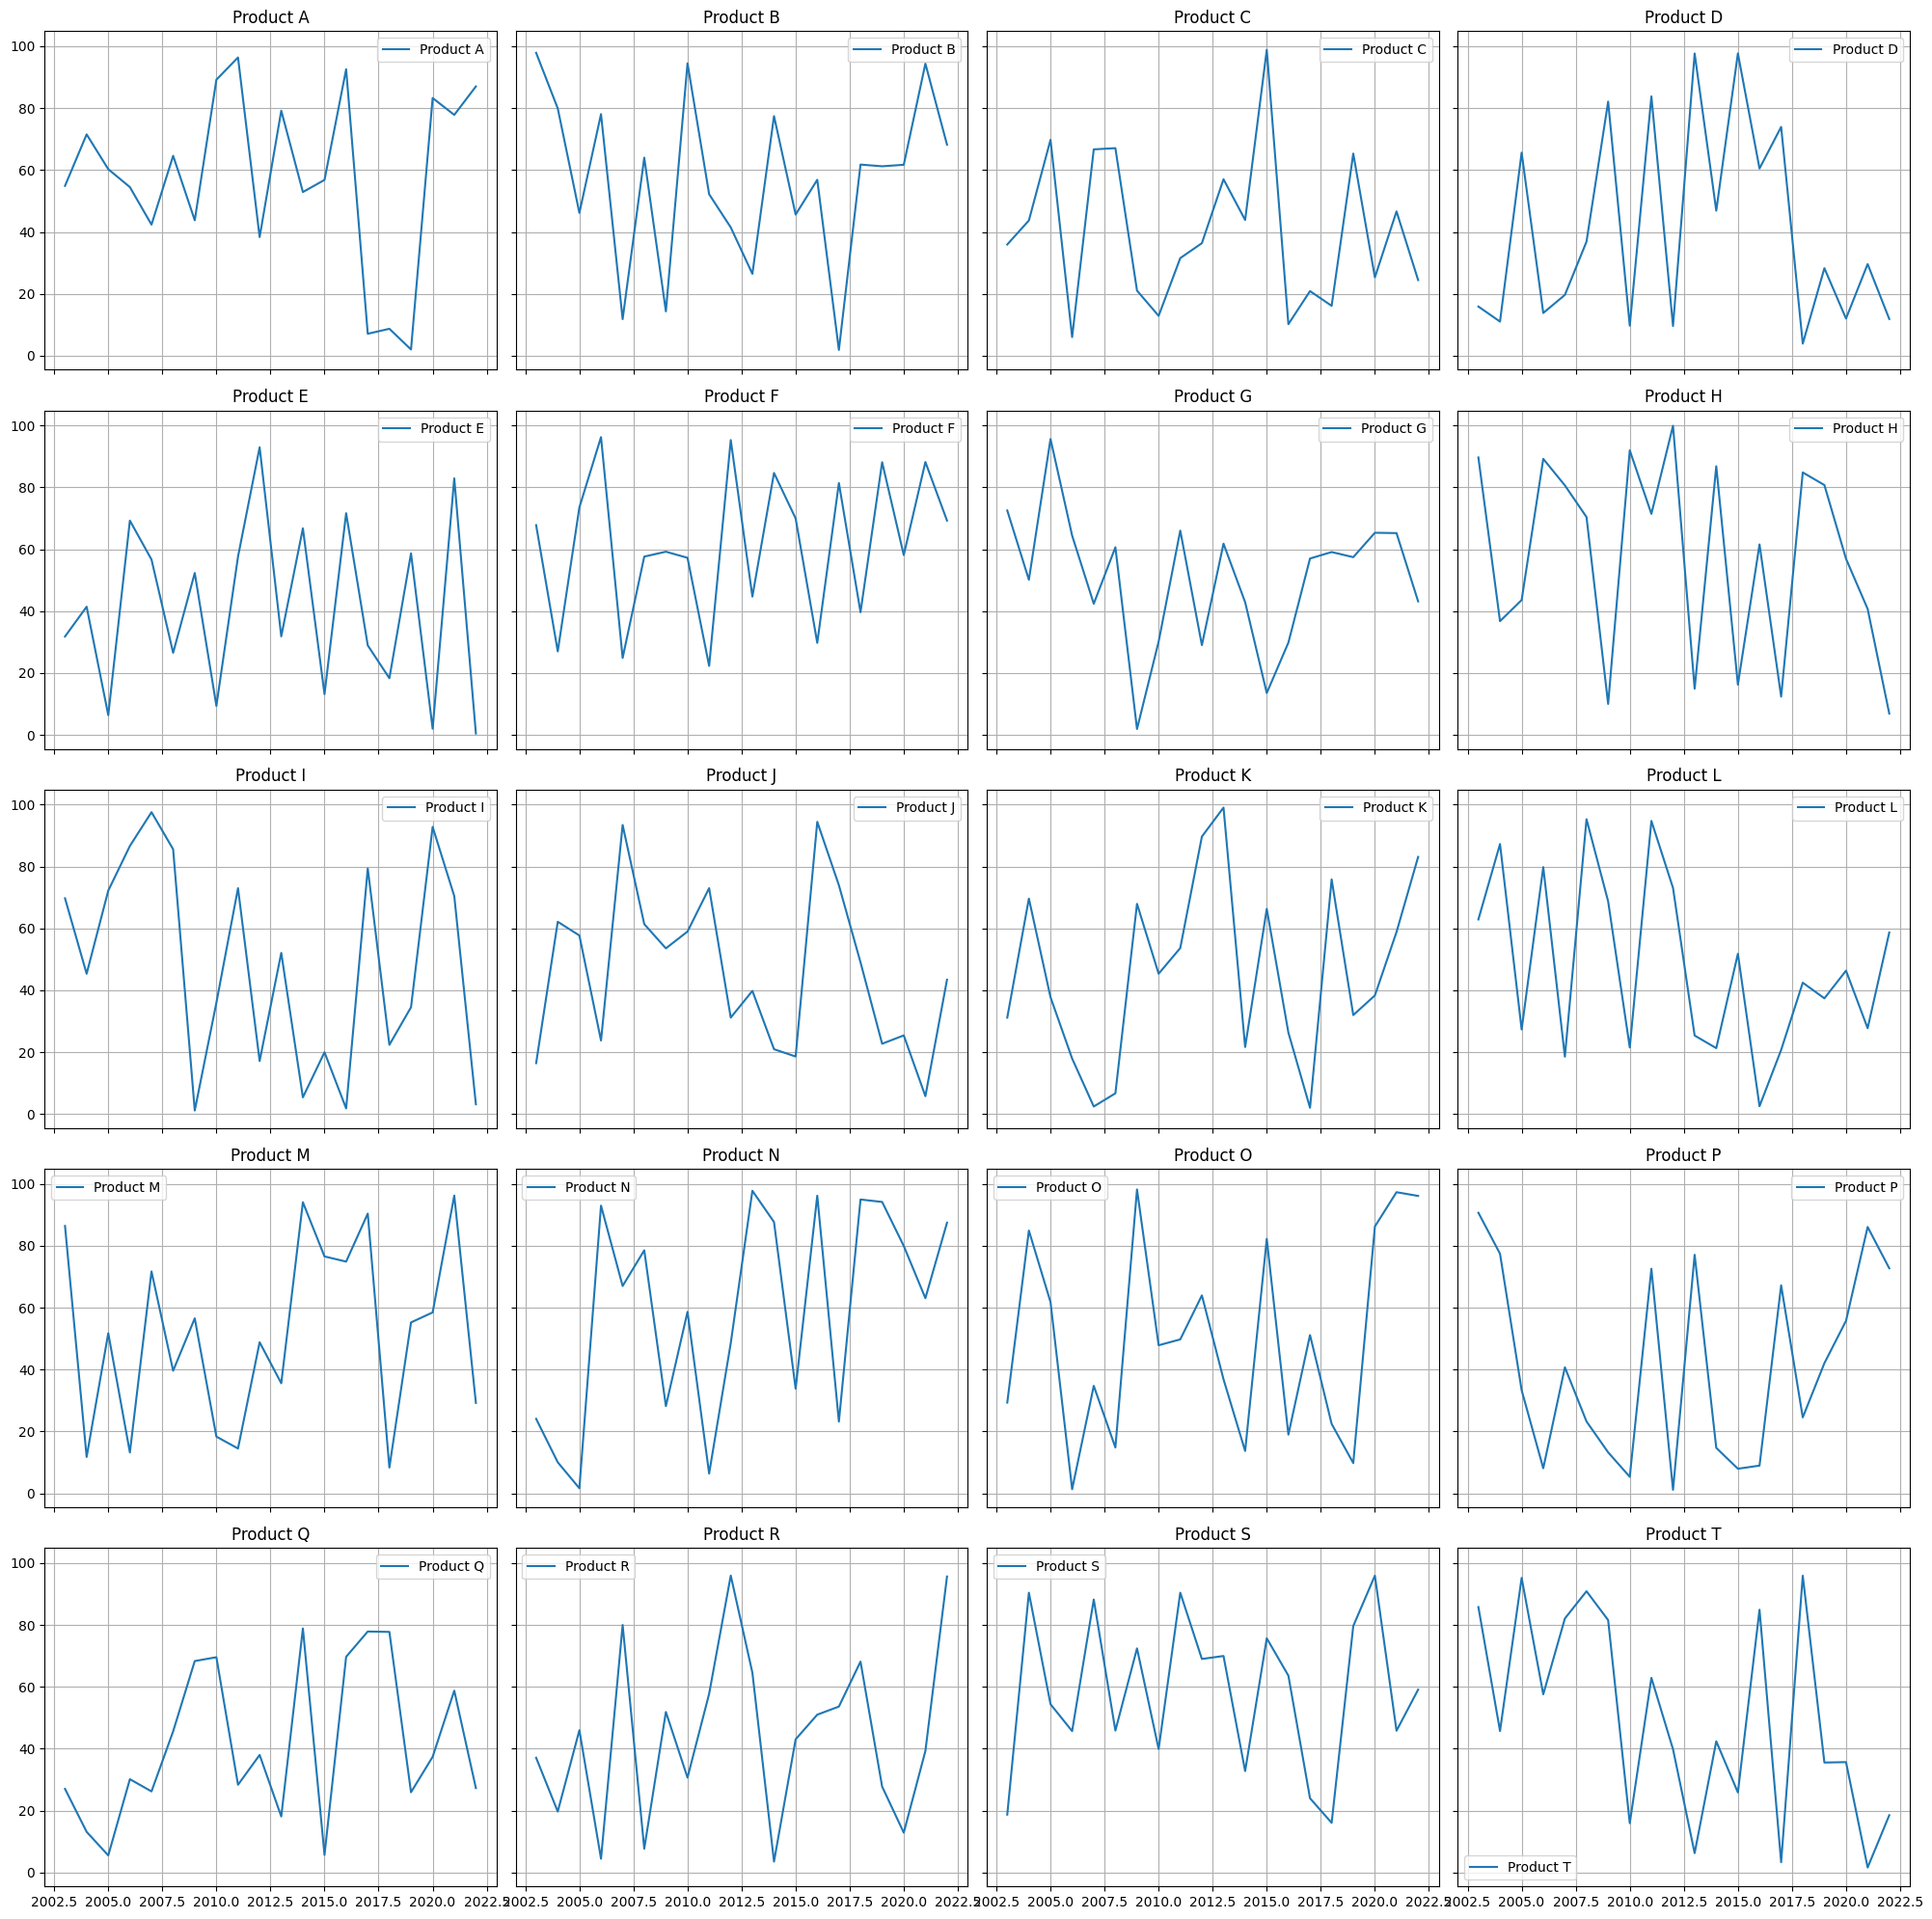

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data creation for multiple products
np.random.seed(0)
years = np.arange(2003, 2023)
products = [f'Product {chr(65+i)}' for i in range(20)]  # 20 products (A to T)
years_repeated = np.tile(years, len(products))
products_repeated = np.repeat(products, len(years))
values = np.random.rand(len(years) * len(products)) * 100

# Creating a DataFrame directly without using a dictionary
data = {
    'year': years_repeated,
    'value': values,
    'product': products_repeated
}

time_series = pd.DataFrame(data)

# Plotting
num_products = len(products)
cols = 4  # Number of columns of subplots
rows = (num_products + cols - 1) // cols  # Calculate the required number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 20), sharex=True, sharey=True)

for i, product in enumerate(products):
    row, col = divmod(i, cols)
    ax = axs[row, col]
    product_time_series = time_series[time_series['product'] == product]
    ax.plot(
        product_time_series['year'],
        product_time_series['value'],
        label=product
    )
    ax.set_title(product)
    ax.grid(True)
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [73]:
# Displaying the columns of export data categorized by product:
# - For export values: `exports_by_product_v` dataset columns.
print("Columns for export values by product: ", exported_value.columns)
# - For growth in export values: `exports_by_product_giv` dataset columns.
print("Columns for growth in export values by product: ", export_value_growth.columns)
# - For share in value percentage: `exports_by_product_sivp` dataset columns.
print("Columns for share in export value percentage by product: ", share_of_country_cluster_exports.columns)

Columns for export values by product:  Index(['Code', 'Product label', 'Exported value in 2003',
       'Exported value in 2004', 'Exported value in 2005',
       'Exported value in 2006', 'Exported value in 2007',
       'Exported value in 2008', 'Exported value in 2009',
       'Exported value in 2010', 'Exported value in 2011',
       'Exported value in 2012', 'Exported value in 2013',
       'Exported value in 2014', 'Exported value in 2015',
       'Exported value in 2016', 'Exported value in 2017',
       'Exported value in 2018', 'Exported value in 2019',
       'Exported value in 2020', 'Exported value in 2021',
       'Exported value in 2022'],
      dtype='object')
Columns for growth in export values by product:  Index(['Code', 'Product label',
       'exportations growth in value between 2003-2004, %',
       'exportations growth in value between 2004-2005, %',
       'exportations growth in value between 2005-2006, %',
       'exportations growth in value between 2006-2007,

In [74]:
# Column Renaming
years = np.arange(2003, 2023)
exported_value.columns = ['code', 'product'] + [f'value_{year}' for year in years]
export_value_growth.columns = ['code', 'product'] + [f'growth_{year}' for year in years[:-1]] + ['value_2022']
share_of_country_cluster_exports.columns = ['code', 'product'] + [f'share_{year}' for year in years]

In [75]:
# Merge exports by product values, growth in value and share in value percentage
exported_value = exported_value.drop(columns=['code'])
export_value_growth = export_value_growth.drop(columns=['code', 'value_2022'])
share_of_country_cluster_exports = share_of_country_cluster_exports.drop(columns=['code'])
merged_exports = pd.merge(exported_value, share_of_country_cluster_exports, on='product')
merged_exports = pd.merge(merged_exports, export_value_growth, on='product')
merged_exports.head()

product  value_2003  value_2004  \
0                                       All products     8738341     9870179   
1                                        Fertilisers      371608      431325   
2  Vehicles other than railway or tramway rolling...       46680       55256   
3  Electrical machinery and equipment and parts t...     1176179     1257912   
4  Articles of apparel and clothing accessories, ...     1952757     2116194   

   value_2005  value_2006  value_2007  value_2008  value_2009  value_2010  \
0    11197413    12731303    15321255    20094617    14027369    17764791   
1      444344      533674      876747     1412452      697642     1561945   
2       76111      117890      161777      201129      223629      245346   
3     1599657     1930282     2359746     2504401     1998575     2632491   
4     2040800     2377490     2532616     2483422     2236326     2142622   

   value_2011  ...  growth_2012  growth_2013  growth_2014  growth_2015  \
0    21649934  ...          3.0          8.0         -7.0          3.0   
1     2317995  ...        -20.0          7.0         -9.0         14.0   
2      426212  ...         66.0         50.0          8.0         19.0   
3     3172824  ...         12.0         19.0         -7.0          7.0   
4     2280072  ...          0.0          6.0        -14.0          9.0   

   growth_2016  growth_2017  growth_2018  growth_2019  growth_2020  \
0         12.0         14.0          1.0         -6.0         32.0   
1         21.0         23.0         -8.0         16.0         69.0   
2          8.0         14.0         -1.0         -6.0         39.0   
3         13.0         17.0          8.0        -12.0         13.0   
4          7.0          5.0         -4.0        -21.0         32.0   

   growth_2021  
0         16.0  
1         35.0  
2         26.0  
3         14.0  
4          8.0  

[5 rows x 60 columns]

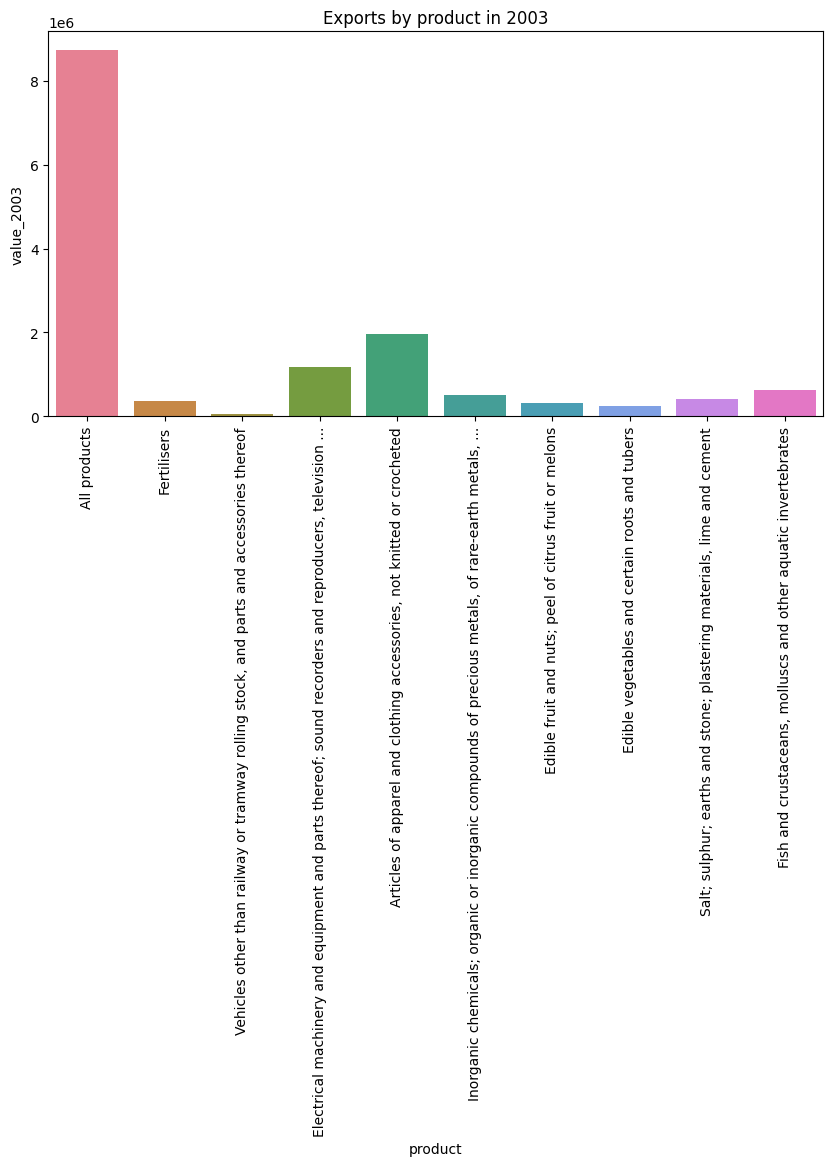

In [76]:
# Define a color palette with as many colors as there are bars
palette = sns.color_palette("husl", len(merged_exports[:10]))

# Visualize exports by product of 2003
plt.figure(figsize=(10, 5))
sns.barplot(x='product', y='value_2003', data=merged_exports[:10], palette=palette) # first 10 values, each bar has a different color
plt.xticks(rotation=90)
plt.title('Exports by product in 2003')
plt.show()


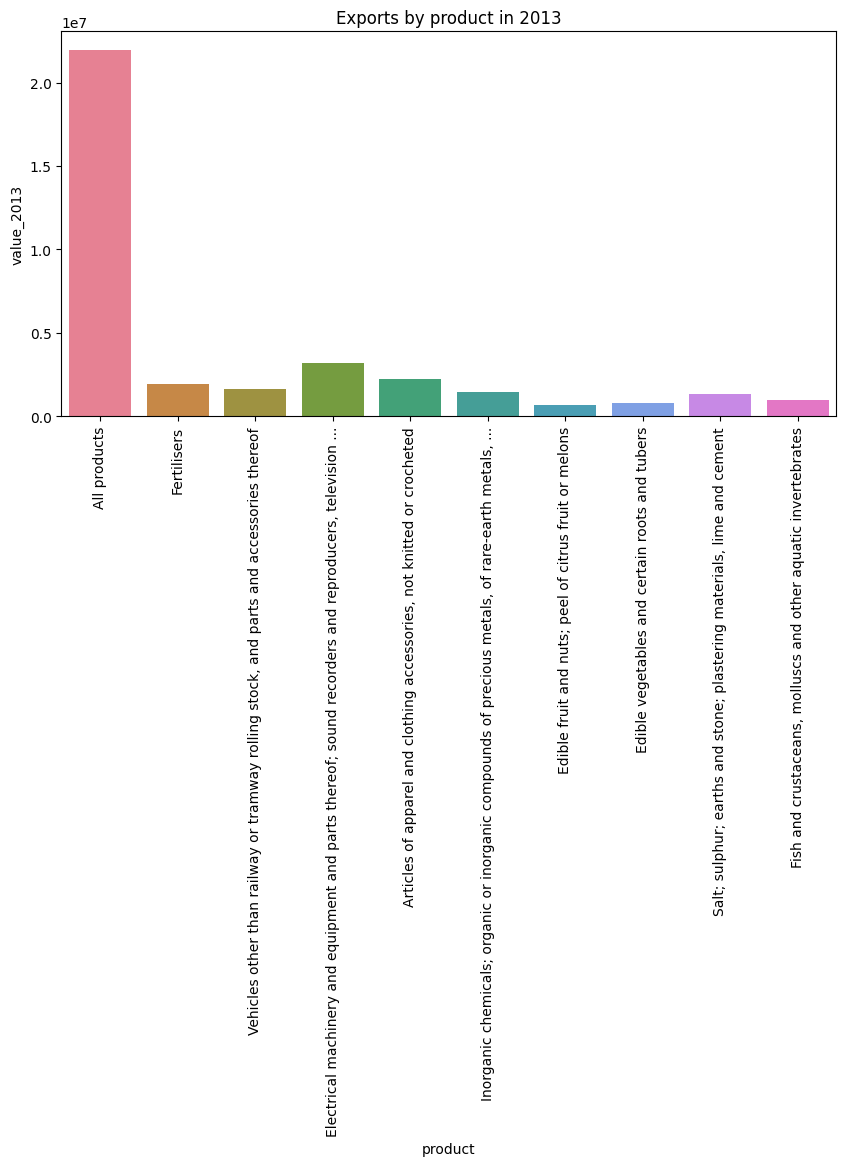

In [77]:
# Define a color palette with as many colors as there are bars
palette = sns.color_palette("husl", len(merged_exports[:10]))

# Visualize exports by product of 2013
plt.figure(figsize=(10, 5))
sns.barplot(x='product', y='value_2013', data=merged_exports[:10], palette=palette) # first 10 values, each bar has a different color
plt.xticks(rotation=90)
plt.title('Exports by product in 2013')
plt.show()


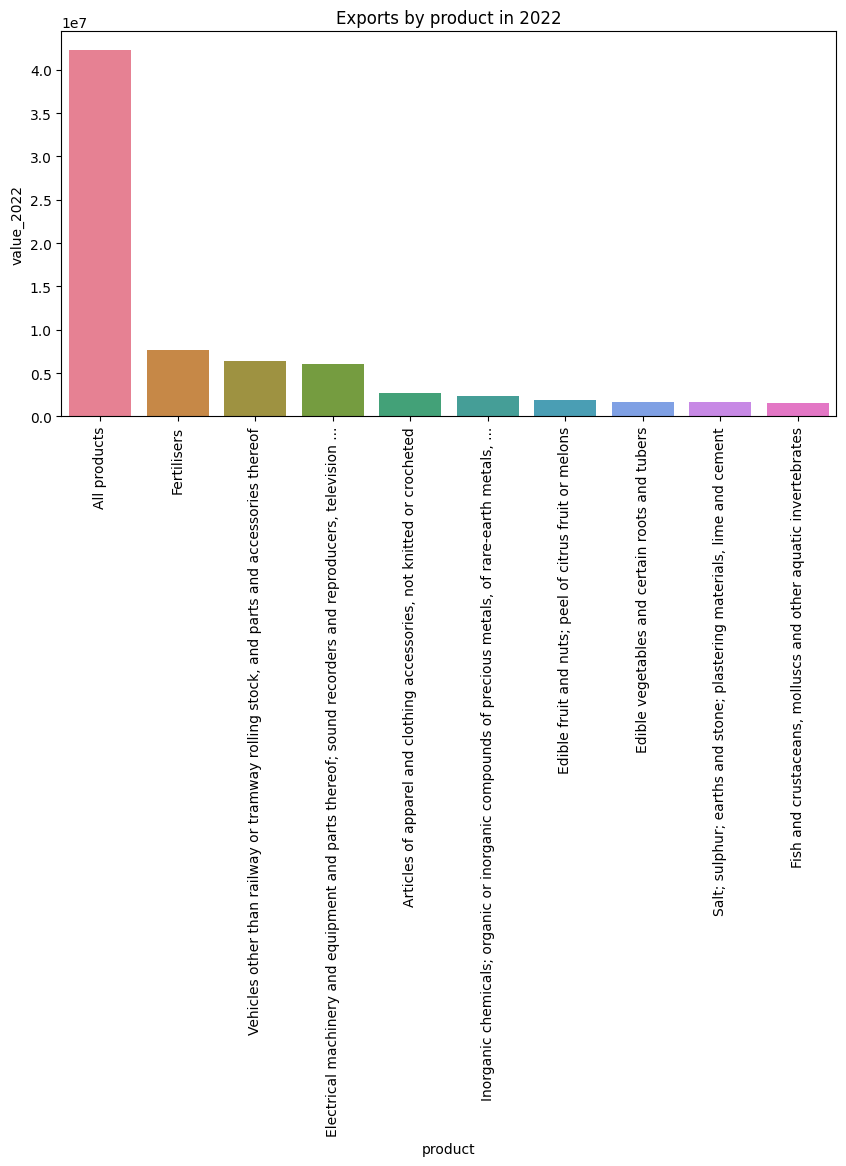

In [78]:
# Define a color palette with as many colors as there are bars
palette = sns.color_palette("husl", len(merged_exports[:10]))

# Visualize exports by product of 2022
plt.figure(figsize=(10, 5))
sns.barplot(x='product', y='value_2022', data=merged_exports[:10], palette=palette) # first 10 values, each bar has a different color
plt.xticks(rotation=90)
plt.title('Exports by product in 2022')
plt.show()


In [79]:
# Save data to transitional data
merged_exports.to_csv(r"transitional_data.csv", index=False)

# 2. Data Cleaning and Preprocessing




##Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Loading Data

In [81]:
transitional_df = pd.read_csv('transitional_data.csv')

##Data Preprocessing

In [82]:
transitional_df.head()

product  value_2003  value_2004  \
0                                       All products     8738341     9870179   
1                                        Fertilisers      371608      431325   
2  Vehicles other than railway or tramway rolling...       46680       55256   
3  Electrical machinery and equipment and parts t...     1176179     1257912   
4  Articles of apparel and clothing accessories, ...     1952757     2116194   

   value_2005  value_2006  value_2007  value_2008  value_2009  value_2010  \
0    11197413    12731303    15321255    20094617    14027369    17764791   
1      444344      533674      876747     1412452      697642     1561945   
2       76111      117890      161777      201129      223629      245346   
3     1599657     1930282     2359746     2504401     1998575     2632491   
4     2040800     2377490     2532616     2483422     2236326     2142622   

   value_2011  ...  growth_2012  growth_2013  growth_2014  growth_2015  \
0    21649934  ...          3.0          8.0         -7.0          3.0   
1     2317995  ...        -20.0          7.0         -9.0         14.0   
2      426212  ...         66.0         50.0          8.0         19.0   
3     3172824  ...         12.0         19.0         -7.0          7.0   
4     2280072  ...          0.0          6.0        -14.0          9.0   

   growth_2016  growth_2017  growth_2018  growth_2019  growth_2020  \
0         12.0         14.0          1.0         -6.0         32.0   
1         21.0         23.0         -8.0         16.0         69.0   
2          8.0         14.0         -1.0         -6.0         39.0   
3         13.0         17.0          8.0        -12.0         13.0   
4          7.0          5.0         -4.0        -21.0         32.0   

   growth_2021  
0         16.0  
1         35.0  
2         26.0  
3         14.0  
4          8.0  

[5 rows x 60 columns]

In [83]:
transitional_df.tail()

product  value_2003  value_2004  \
93  Musical instruments; parts and accessories of ...         198         122   
94                                               Silk         206          26   
95                          Lead and articles thereof       29453       17633   
96  Arms and ammunition; parts and accessories the...           6          37   
97                Commodities not elsewhere specified           0           0   

    value_2005  value_2006  value_2007  value_2008  value_2009  value_2010  \
93          91          44          52          41          80          37   
94          34         171         520         326         497         157   
95       52435       71741      113287       86322       70079       87763   
96           4          28         600        1178          65        2251   
97           0           0           0           0           0           0   

    value_2011  ...  growth_2012  growth_2013  growth_2014  growth_2015  \
93          55  ...        -57.0         42.0         44.0         18.0   
94         541  ...        114.0         66.0         -2.0        -24.0   
95       85290  ...        -45.0        -14.0        -41.0        -98.0   
96        1993  ...          NaN          NaN          NaN       4000.0   
97           0  ...          NaN          NaN       -100.0          NaN   

    growth_2016  growth_2017  growth_2018  growth_2019  growth_2020  \
93        -26.0         44.0        -43.0         14.0        353.0   
94        -74.0         60.0         94.0         -3.0        -89.0   
95        -64.0       6375.0        -64.0        -99.0       -100.0   
96       3563.0        -87.0        -10.0       -100.0          NaN   
97          NaN          NaN          NaN          NaN          NaN   

    growth_2021  
93        -48.0  
94         20.0  
95          NaN  
96          NaN  
97          NaN  

[5 rows x 60 columns]

In [84]:
transitional_df.describe()

value_2003    value_2004    value_2005    value_2006    value_2007  \
count  9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01   
mean   1.783335e+05  2.014323e+05  2.285186e+05  2.598225e+05  3.126787e+05   
std    9.112747e+05  1.025980e+06  1.159090e+06  1.318700e+06  1.583579e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.920250e+03  1.464500e+03  3.471000e+03  5.006750e+03  5.985000e+03   
50%    1.313200e+04  1.690100e+04  1.882900e+04  2.399000e+04  2.443850e+04   
75%    4.119425e+04  4.821850e+04  5.780675e+04  6.796100e+04  8.801100e+04   
max    8.738341e+06  9.870179e+06  1.119741e+07  1.273130e+07  1.532126e+07   

         value_2008    value_2009    value_2010    value_2011    value_2012  \
count  9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01  9.800000e+01   
mean   4.100942e+05  2.862728e+05  3.625467e+05  4.418354e+05  4.370854e+05   
std    2.081394e+06  1.445491e+06  1.828460e+06  2.231009e+06  2.203461e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.472500e+03  4.936250e+03  6.190750e+03  6.190250e+03  6.659000e+03   
50%    2.651550e+04  2.330050e+04  3.067950e+04  2.719300e+04  2.725550e+04   
75%    9.365950e+04  8.859300e+04  1.162568e+05  9.738800e+04  1.196208e+05   
max    2.009462e+07  1.402737e+07  1.776479e+07  2.164993e+07  2.141718e+07   

       ...  growth_2012  growth_2013  growth_2014  growth_2015  growth_2016  \
count  ...    96.000000    96.000000    97.000000    97.000000    97.000000   
mean   ...    39.197917    28.197917    -8.938144    80.226804    56.958763   
std    ...   262.101170    76.776726    50.576430   464.549233   370.709958   
min    ...   -90.000000   -89.000000  -100.000000   -98.000000   -94.000000   
25%    ...   -16.250000    -1.250000   -28.000000    -7.000000    -1.000000   
50%    ...     5.500000    16.000000   -11.000000     6.000000    11.000000   
75%    ...    24.250000    37.250000     3.000000    17.000000    25.000000   
max    ...  2488.000000   445.000000   344.000000  4000.000000  3563.000000   

       growth_2017  growth_2018  growth_2019  growth_2020  growth_2021  
count    97.000000    97.000000    97.000000    96.000000    95.000000  
mean    180.690722     4.835052     3.402062    39.281250    15.578947  
std    1131.951278    66.558665    90.900204    77.077364    61.093159  
min     -87.000000   -92.000000  -100.000000  -100.000000   -77.000000  
25%       0.000000   -11.000000   -21.000000     4.750000    -5.500000  
50%      14.000000    -1.000000    -6.000000    25.000000     7.000000  
75%      37.000000    11.000000    11.000000    47.250000    23.500000  
max    9233.000000   583.000000   791.000000   521.000000   501.000000  

[8 rows x 59 columns]

In [85]:
# Check for missing values
transitional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      98 non-null     object 
 1   value_2003   98 non-null     int64  
 2   value_2004   98 non-null     int64  
 3   value_2005   98 non-null     int64  
 4   value_2006   98 non-null     int64  
 5   value_2007   98 non-null     int64  
 6   value_2008   98 non-null     int64  
 7   value_2009   98 non-null     int64  
 8   value_2010   98 non-null     int64  
 9   value_2011   98 non-null     int64  
 10  value_2012   98 non-null     int64  
 11  value_2013   98 non-null     int64  
 12  value_2014   98 non-null     int64  
 13  value_2015   98 non-null     int64  
 14  value_2016   98 non-null     int64  
 15  value_2017   98 non-null     int64  
 16  value_2018   98 non-null     int64  
 17  value_2019   98 non-null     int64  
 18  value_2020   98 non-null     int64  
 19  value_2021

In [86]:
# Generate time series data for each product with a frequency of 1 year

# Remove the initial row to ensure accurate time series creation

transitional_df = transitional_df.iloc[1:]
# Extract the unique list of products
products = transitional_df['product'].unique()
# Define the range of years
years = np.arange(2003, 2023)

# Construct a time series dataframe with columns: product, year, value, and share
time_series = pd.DataFrame()
for product in products:
    for year in years:
        value = transitional_df.loc[transitional_df['product'] == product, f'value_{year}'].values[0]
        share = transitional_df.loc[transitional_df['product'] == product, f'share_{year}'].values[0]
        data = pd.DataFrame({'product': [product], 'year': [year], 'value': [value], 'share': [share]})
        time_series = pd.concat([time_series, data])

time_series = time_series.reset_index(drop=True)
time_series

product  year   value  share
0                             Fertilisers  2003  371608   4.25
1                             Fertilisers  2004  431325   4.37
2                             Fertilisers  2005  444344   3.97
3                             Fertilisers  2006  533674   4.19
4                             Fertilisers  2007  876747   5.72
...                                   ...   ...     ...    ...
1935  Commodities not elsewhere specified  2018       0   0.00
1936  Commodities not elsewhere specified  2019       0   0.00
1937  Commodities not elsewhere specified  2020       0   0.00
1938  Commodities not elsewhere specified  2021       0   0.00
1939  Commodities not elsewhere specified  2022       0   0.00

[1940 rows x 4 columns]

In [87]:
#Check the count of missing values in the time series data
time_series.isna().sum()

product    0
year       0
value      0
share      0
dtype: int64

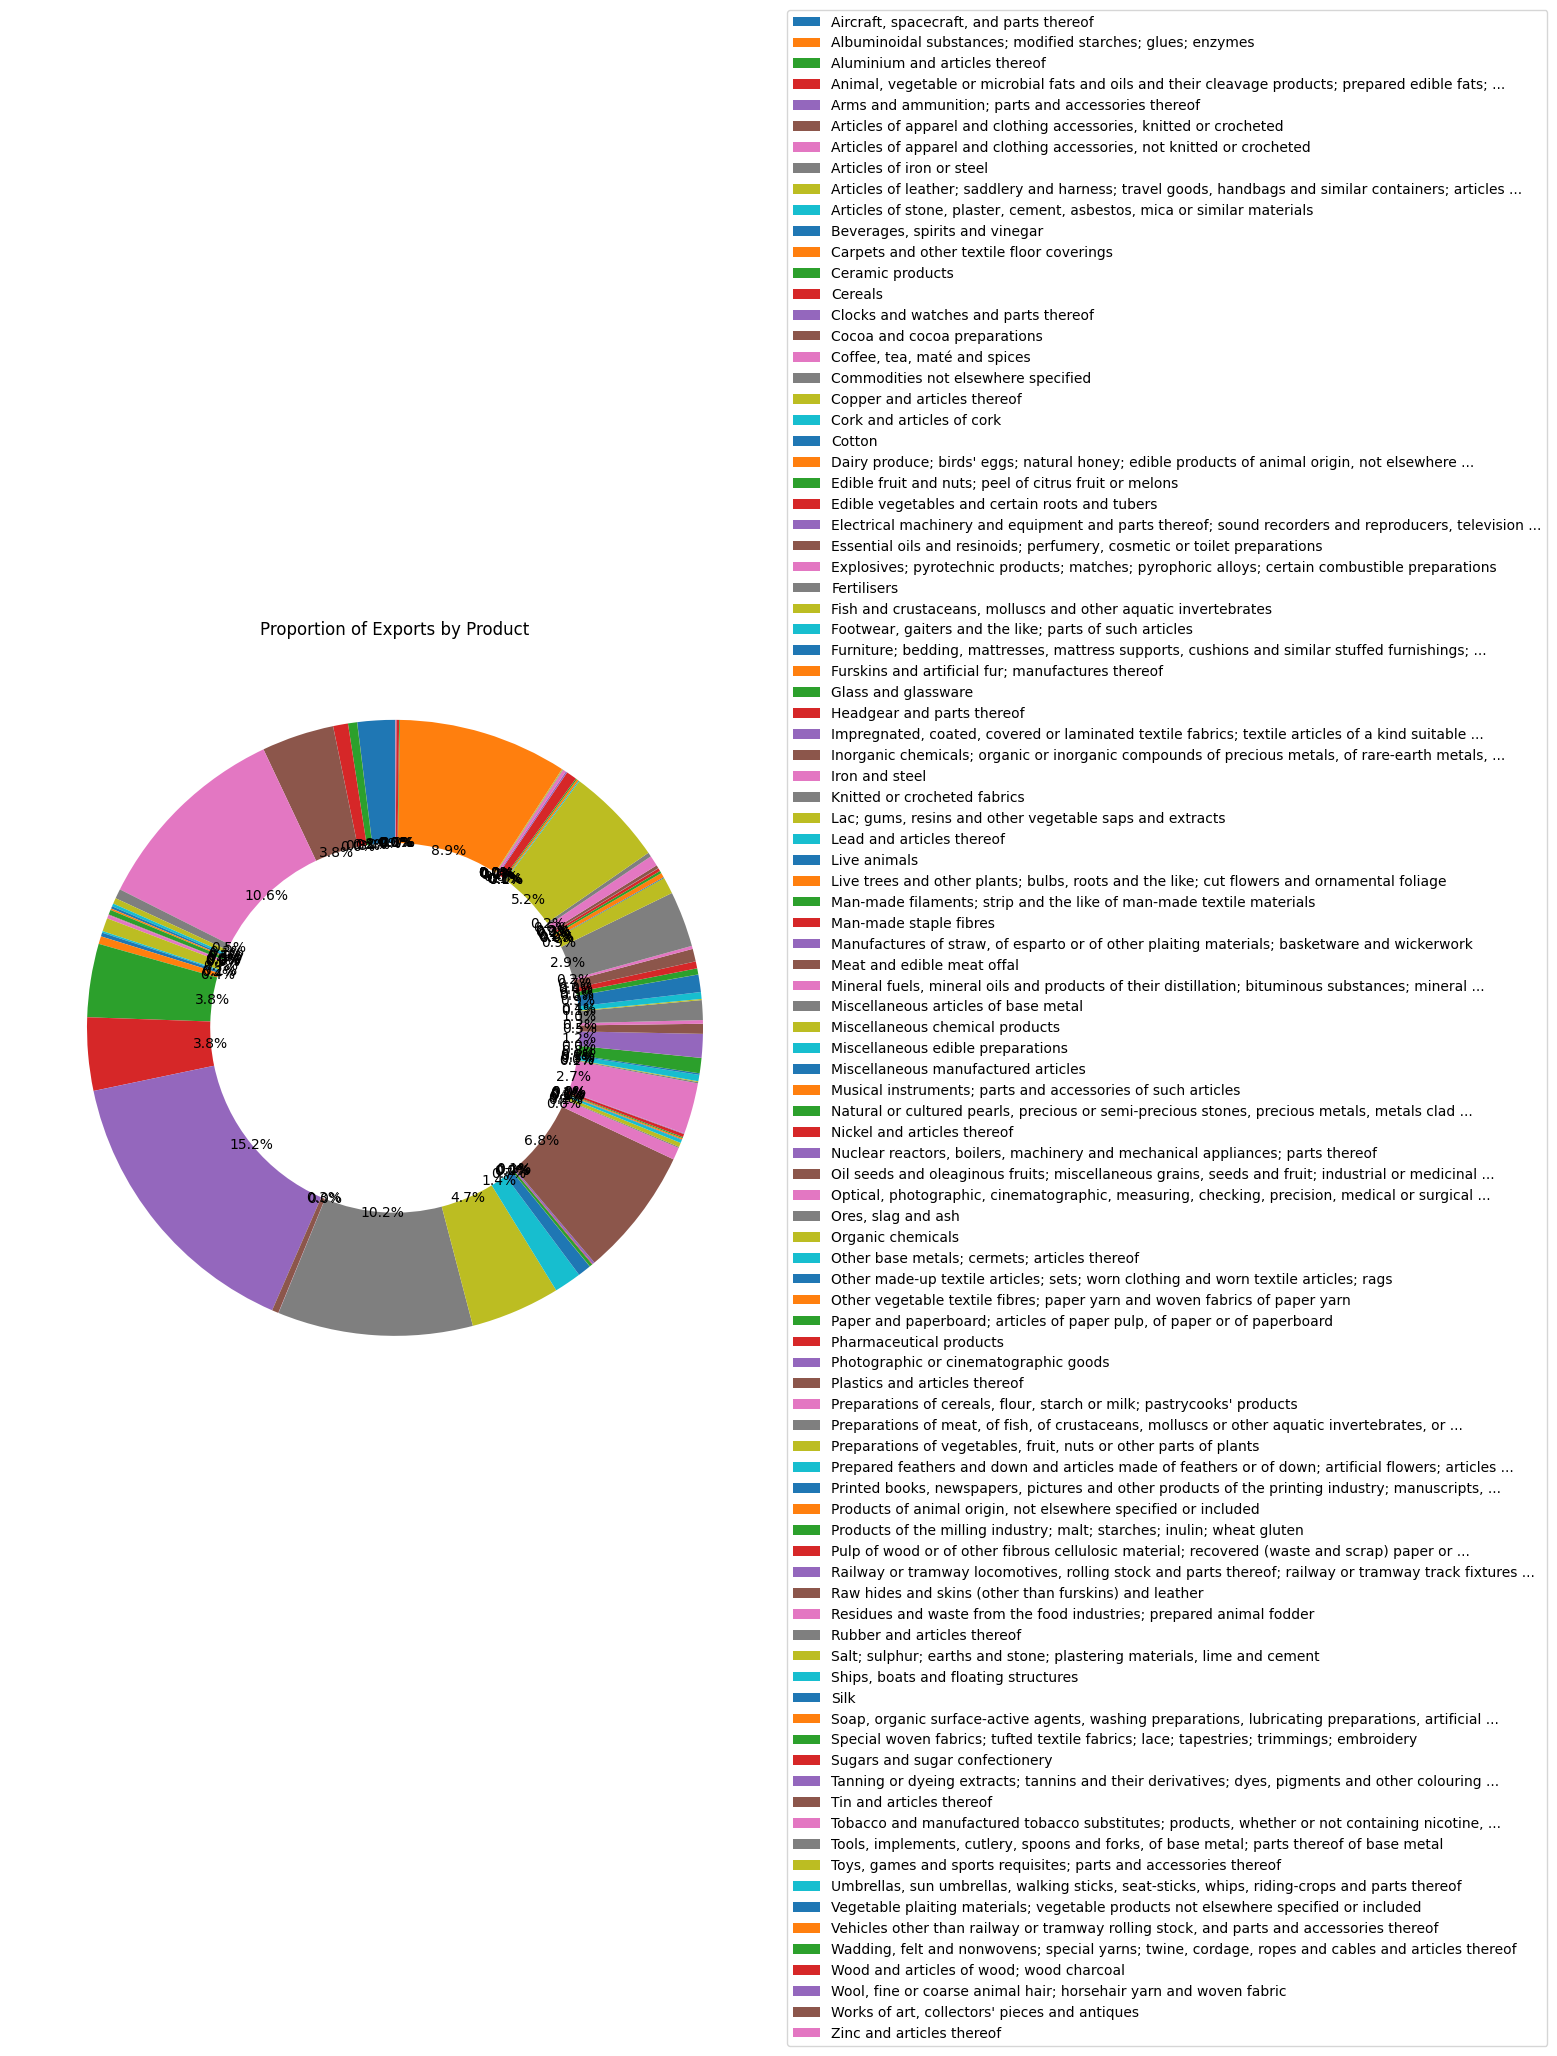

In [88]:
import matplotlib.pyplot as plt

# Calculate the total exports for each product
total_exports = time_series.groupby('product')['value'].sum()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the donut chart showing the proportion of exports for each product
wedges, texts, autotexts = ax.pie(total_exports, labels=None, wedgeprops=dict(width=0.4), startangle=90, autopct='%1.1f%%')

# Draw a circle in the center of the donut chart to create the hole
centre_circle = plt.Circle((0,0),0.4,fc='white')
ax.add_artist(centre_circle)

# Set up the title
ax.set_title('Proportion of Exports by Product')

# Adjust font size for better readability
plt.setp(autotexts, size=10)
plt.setp(texts, size=10)

# Add a legend to provide a clearer representation
ax.legend(total_exports.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Show the plot
plt.show()


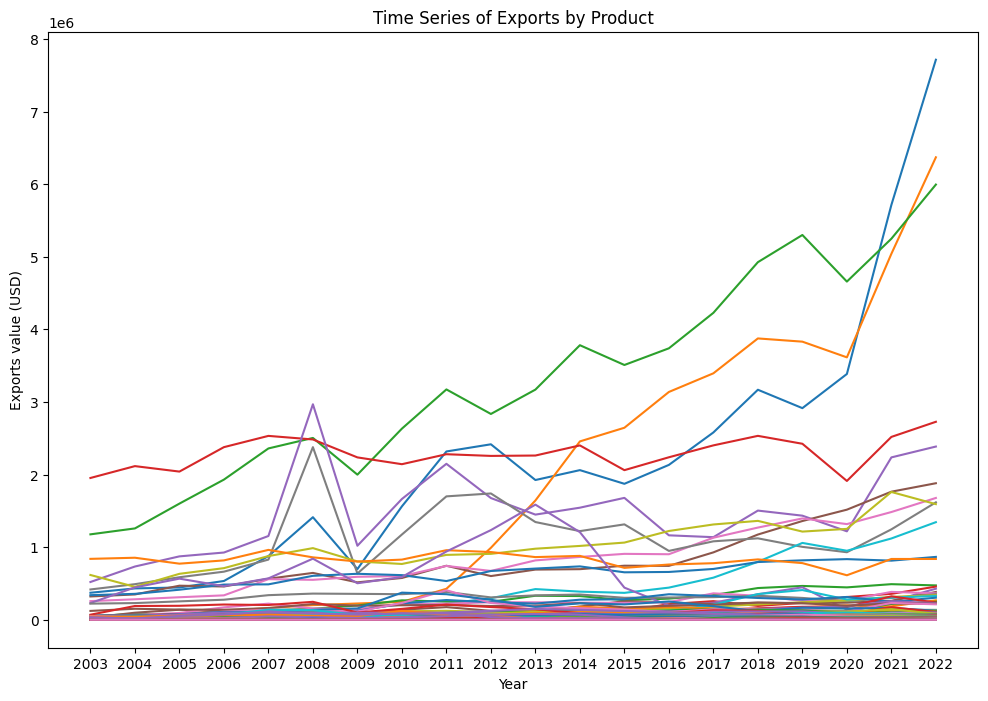

In [89]:
# Plot the export time series for each product
fig, ax = plt.subplots(figsize=(12, 8))
for product in time_series['product'].unique():
    product_time_series = time_series[time_series['product'] == product]
    ax.plot(product_time_series['year'], product_time_series['value'], label=product)

# Ensure the x-axis displays integer years and includes all years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(np.arange(2003, 2023, 1))

# Set up the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Exports value (USD)')
ax.set_title('Time Series of Exports by Product')
plt.show()

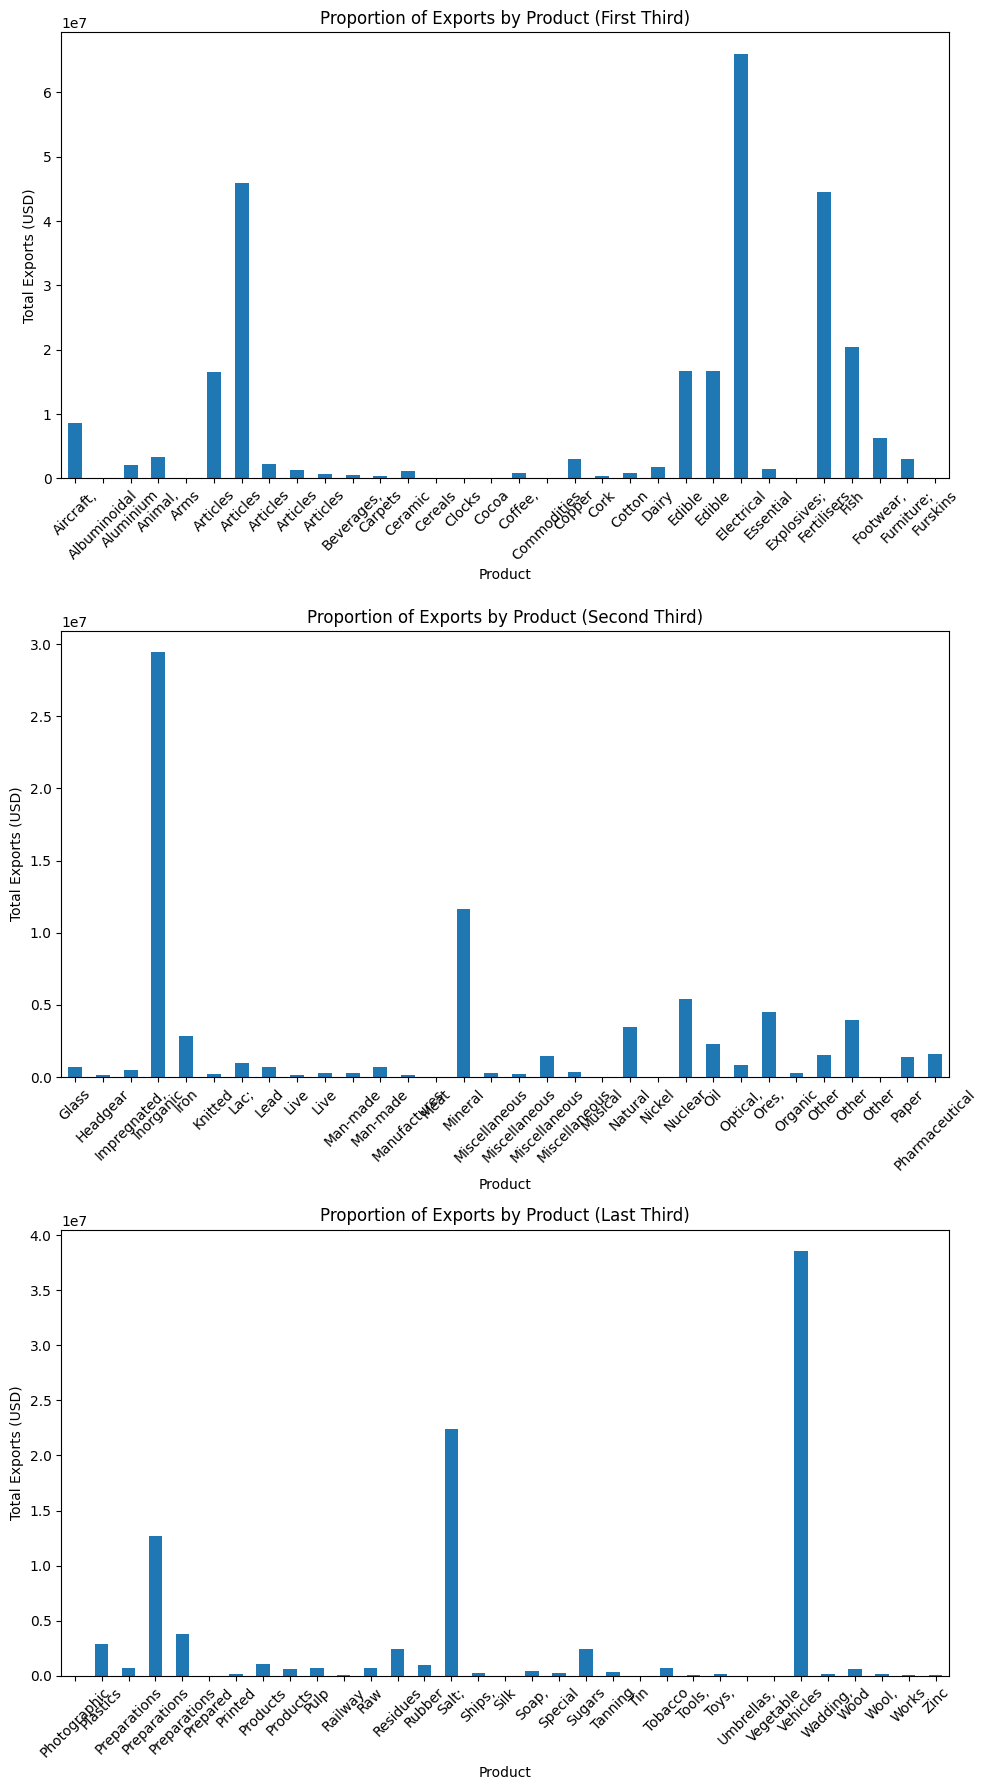

In [90]:
# Divide the products into three groups
num_products = len(total_exports)
num_products_third = num_products // 3

# Extract the first word of each product name
product_labels = total_exports.index.str.split().str[0]

# Set up the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot the bar chart for the first group of products
total_exports.iloc[:num_products_third].plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Product')
axs[0].set_ylabel('Total Exports (USD)')
axs[0].set_title('Proportion of Exports by Product (First Third)')
axs[0].set_xticklabels(product_labels[:num_products_third], rotation=45)  # Rotate x-axis labels

# Plot the bar chart for the second group of products
total_exports.iloc[num_products_third:2*num_products_third].plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Product')
axs[1].set_ylabel('Total Exports (USD)')
axs[1].set_title('Proportion of Exports by Product (Second Third)')
axs[1].set_xticklabels(product_labels[num_products_third:2*num_products_third], rotation=45)  # Rotate x-axis labels

# Plot the bar chart for the third group of products
total_exports.iloc[2*num_products_third:].plot(kind='bar', ax=axs[2])
axs[2].set_xlabel('Product')
axs[2].set_ylabel('Total Exports (USD)')
axs[2].set_title('Proportion of Exports by Product (Last Third)')
axs[2].set_xticklabels(product_labels[2*num_products_third:], rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [91]:
#Save the processed data
time_series.to_csv(r"processed_data.csv", index=False)

#3. Model Training

##Importing Libraries

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

##Data Preparation

In [93]:
# Data Loading
processed_df = pd.read_csv('processed_data.csv')

In [94]:
processed_df.describe()

year         value        share
count  1940.000000  1.940000e+03  1940.000000
mean   2012.500000  2.241180e+05     1.030902
std       5.767768  6.286048e+05     2.642180
min    2003.000000  0.000000e+00     0.000000
25%    2007.750000  5.224000e+03     0.030000
50%    2012.500000  2.590350e+04     0.130000
75%    2017.250000  1.120512e+05     0.530000
max    2022.000000  7.715003e+06    22.350000

In [95]:
processed_df.head()

product  year   value  share
0  Fertilisers  2003  371608   4.25
1  Fertilisers  2004  431325   4.37
2  Fertilisers  2005  444344   3.97
3  Fertilisers  2006  533674   4.19
4  Fertilisers  2007  876747   5.72

In [96]:
processed_df.tail()

product  year  value  share
1935  Commodities not elsewhere specified  2018      0    0.0
1936  Commodities not elsewhere specified  2019      0    0.0
1937  Commodities not elsewhere specified  2020      0    0.0
1938  Commodities not elsewhere specified  2021      0    0.0
1939  Commodities not elsewhere specified  2022      0    0.0

In [97]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  1940 non-null   object 
 1   year     1940 non-null   int64  
 2   value    1940 non-null   int64  
 3   share    1940 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 60.8+ KB



# 3.1 The first Model
*   ### First we load the preprocessed data, normalize it, and create temporal sequences for model training.
*   ### We use an RNN (specifically LSTM) due to its ability to capture temporal dependencies in sequential data.
*   ### The data is split into training and testing sets, and a simple RNN model with one LSTM layer and a dense output layer is created.
*   ### Early stopping is implemented to prevent overfitting, and the model is trained and evaluated on the test set.







In [98]:
# Load the data
processed_df = pd.read_csv("processed_data.csv")

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(processed_df[['year', 'value', 'share']])

# Create time sequences for model training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RNN model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3)  # 3 car nous prédisons trois valeurs (année, valeur et part)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define callbacks to stop early if validation loss does not decrease
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Make predictions on the test set
predictions = model.predict(X_test)

# Invert normalization to get actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Display predictions and actual values
for i in range(len(predictions)):
    print("Prédiction:", predictions[i])
    print("Valeur réelle:", y_test[i])
    print("---------------------------------------")

# Evaluate model performance
mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error:", mse)

Epoch 1/100
44/44 [==============================] - 3s 18ms/step - loss: 0.0454 - val_loss: 0.0315
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.0256
Epoch 3/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.0175
Epoch 4/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0163 - val_loss: 0.0174
Epoch 5/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0158 - val_loss: 0.0156
Epoch 6/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0150 - val_loss: 0.0157
Epoch 7/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 8/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 9/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 10/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 11

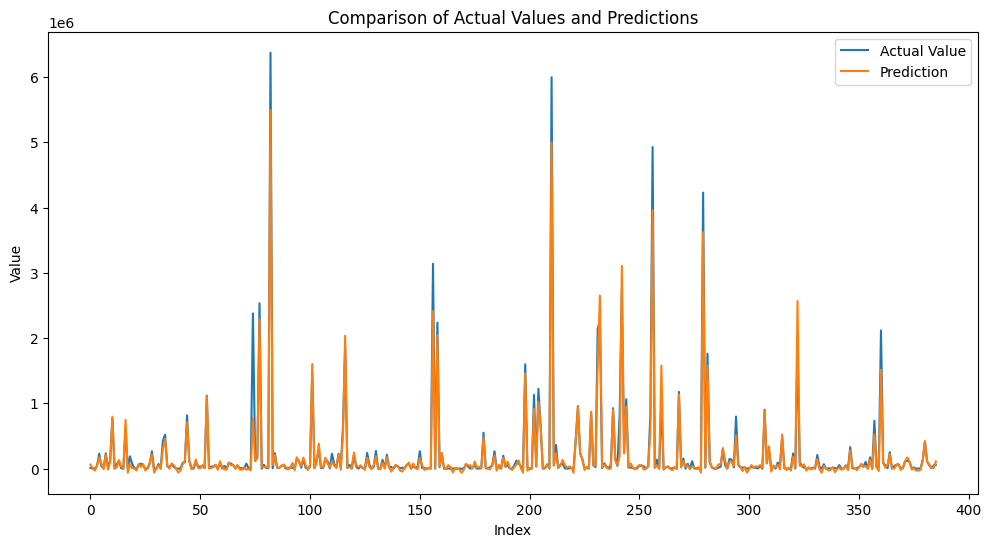

Mean Squared Error: 23904667711.41243


In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the actual values and predictions for the 'value' variable
plt.figure(figsize=(12, 6))

# Comparison of actual values and predictions for the 'value' variable
plt.plot(y_test[:, 1], label='Actual Value')  # Index 1 corresponds to 'value'
plt.plot(predictions[:, 1], label='Prediction')  # Index 1 corresponds to 'value'

plt.title('Comparison of Actual Values and Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the mean squared error
mse = np.mean((predictions[:, 1] - y_test[:, 1])**2)
print("Mean Squared Error:", mse)



In [100]:
import joblib

# Save the model as a pickle file
joblib.dump(model, 'rnn_model.pkl')


['rnn_model.pkl']

#3.2 The second Model

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pickle
import warnings
warnings.filterwarnings("ignore")

In [102]:
# Create a dictionary to store the data grouped by product
product_repository = {}

# Group the data by product
grouped_data = processed_df.groupby('product')

# Iterate through each group
for product, group_df in grouped_data:
    # Reset the index of the group to start from zero
    group_df.reset_index(drop=True, inplace=True)
    # Store the product's data in the dictionary
    product_repository[product] = {'df': group_df, 'len': len(group_df)}


In [103]:
#Training & Testing sets
for product in product_repository:
    df = product_repository[product]['df']
    df_train = df[df['year'] < 2020]
    df_test = df[df['year'] >= 2020]
    product_repository[product]['train'] = df_train
    product_repository[product]['test'] = df_test

### We use the ARIMA (AutoRegressive Integrated Moving Average) as a classical time series forecasting model that is well-suited for our case for several reasons. Firstly, it enables capturing trends and seasonal patterns present in the demand data for local products. Additionally, ARIMA is robust to non-stationary data, which is often the case in economic time series such as the demand for agricultural products.

In [106]:
# Calculate the root mean squared error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    # Forecast the product
def predict_demand(product, order=(5,1,0)):
    # Extract training and testing data
    df_train = product_repository[product]['train']
    df_test = product_repository[product]['test']

# Train the ARIMA model
    model = ARIMA(df_train['value'], order=order)
    model_fit = model.fit()

   # Forecast the testing dataset
    forecast = model_fit.forecast(steps=len(df_test))

# Retrieve the actual values from the testing dataset
    actual = df_test['value'].values

# Compute the forecast error
    error = rmse(actual, forecast.values)

    return forecast, actual, error

In [107]:
# Function testin
results = {}
for product in product_repository:
    print('Forecasting ', product)
    forecast, actual, error = predict_demand(product)
    results[product] = {'forecast': forecast, 'actual': actual, 'error': error}

Forecasting  Aircraft, spacecraft, and parts thereof
Forecasting  Albuminoidal substances; modified starches; glues; enzymes
Forecasting  Aluminium and articles thereof
Forecasting  Animal, vegetable or microbial fats and oils and their cleavage products; prepared edible fats; ...
Forecasting  Arms and ammunition; parts and accessories thereof
Forecasting  Articles of apparel and clothing accessories, knitted or crocheted
Forecasting  Articles of apparel and clothing accessories, not knitted or crocheted
Forecasting  Articles of iron or steel
Forecasting  Articles of leather; saddlery and harness; travel goods, handbags and similar containers; articles ...
Forecasting  Articles of stone, plaster, cement, asbestos, mica or similar materials
Forecasting  Beverages, spirits and vinegar
Forecasting  Carpets and other textile floor coverings
Forecasting  Ceramic products
Forecasting  Cereals
Forecasting  Clocks and watches and parts thereof
Forecasting  Cocoa and cocoa preparations
Forecast

In [108]:
#Compute the total error
overall_error = 0
for product in results:
    overall_error += results[product]['error']
overall_error /= len(results)
for index, product in enumerate(results):
    print("Product: ", product)
    print("RMSE: ", results[product]['error'])
    print("---------------------------------------")
print('Overall RMSE: ', overall_error)

Product:  Aircraft, spacecraft, and parts thereof
RMSE:  403424.0398328307
---------------------------------------
Product:  Albuminoidal substances; modified starches; glues; enzymes
RMSE:  732.3753893244749
---------------------------------------
Product:  Aluminium and articles thereof
RMSE:  82937.18182234194
---------------------------------------
Product:  Animal, vegetable or microbial fats and oils and their cleavage products; prepared edible fats; ...
RMSE:  90344.75632482184
---------------------------------------
Product:  Arms and ammunition; parts and accessories thereof
RMSE:  295.55934772062557
---------------------------------------
Product:  Articles of apparel and clothing accessories, knitted or crocheted
RMSE:  110960.1803074277
---------------------------------------
Product:  Articles of apparel and clothing accessories, not knitted or crocheted
RMSE:  342616.39125152037
---------------------------------------
Product:  Articles of iron or steel
RMSE:  59715.20676

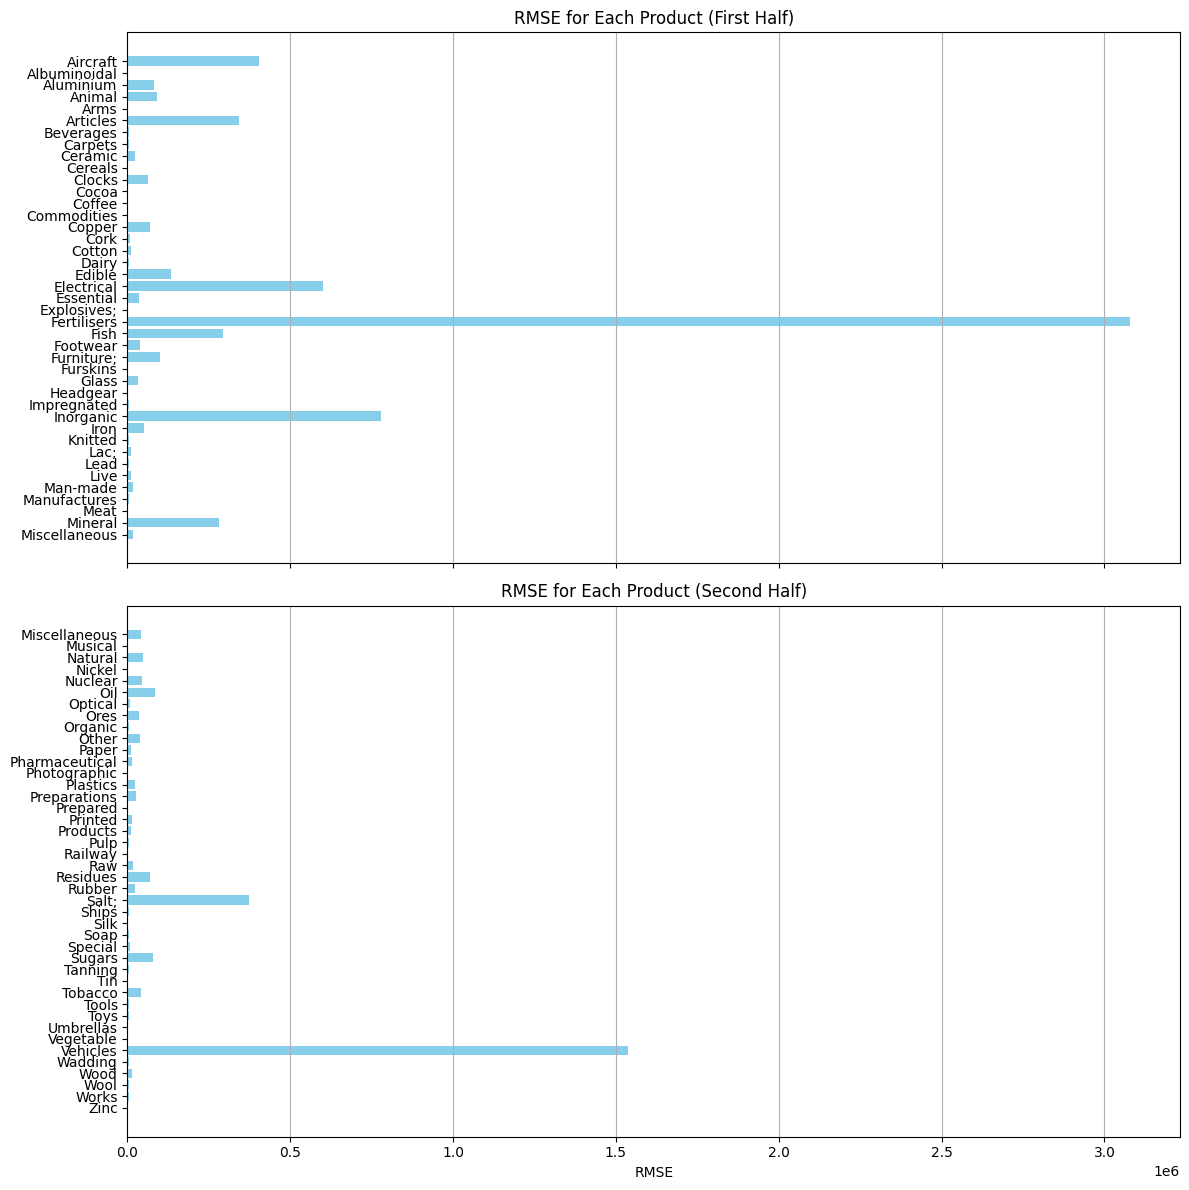

In [109]:
import matplotlib.pyplot as plt

# Split the products into two parts
half_length = len(results) // 2
first_half_products = [product.split(',')[0].split(' ')[0] for product in results.keys()][:half_length]
second_half_products = [product.split(',')[0].split(' ')[0] for product in results.keys()][half_length:]
first_half_errors = [result['error'] for idx, result in enumerate(results.values()) if idx < half_length]
second_half_errors = [result['error'] for idx, result in enumerate(results.values()) if idx >= half_length]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# First subplot for the first half of the products
axs[0].barh(first_half_products, first_half_errors, color='skyblue')
axs[0].set_title('RMSE for Each Product (First Half)')
axs[0].invert_yaxis()  # Invert the y-axis to display products from top to bottom
axs[0].grid(axis='x')  # Add a grid on the x-axis for easier reading

# Second subplot for the second half of the products
axs[1].barh(second_half_products, second_half_errors, color='skyblue')
axs[1].set_title('RMSE for Each Product (Second Half)')
axs[1].invert_yaxis()  # Invert the y-axis to display products from top to bottom
axs[1].grid(axis='x')  # Add a grid on the x-axis for easier reading

plt.xlabel('RMSE')
plt.tight_layout()  # Automatically adjust the space between subplots
plt.show()


In [110]:
# Save the model
with open('ARIMA_model.pkl', 'wb') as f:
    pickle.dump(results, f)